# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing Necessary Libraries

In [1]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore') 

# Data management libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier,
                              StackingClassifier)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             f1_score, confusion_matrix, make_scorer)

# Setting the theme and fontsize of figures
sns.set_theme(style = 'darkgrid', font_scale = 1.13)

# Restricting the float value of a dataframe to 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Removing the limit for the number of displayed columns in a dataframe
pd.set_option("display.max_columns", None)

# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Importing Data

In [2]:
# Loading dataset
data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/EasyVisa.csv')
# Ensuring the original data remains unchanged
df = data_orig.copy()

# Checking top 7 rows
df.head(7)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.140,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.390,Year,Y,Certified


In [3]:
# Checking bottom 7 rows
df.tail(7)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.560,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.780,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


## Data Overview

- Observations
- Sanity checks

### Dataset Shape

In [4]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 25480 rows and 12 columns.


### General Information on the Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observations:

*   The dataset consists of 9 categorical variables and three numerical variables, only one of which (prevailing wage) is continuous. 

*   At this point, no column shows to have any missing values. 

*   'case_id' appears to be unique for every case, and not helpful in modeling, so we will drop it.

In [6]:
# Checking no. of unique case IDs
print('No. of unique case IDs:', df.case_id.nunique(), end = '\n'*2)

# Dropping case ID
df.drop(columns = 'case_id', axis = 1, inplace = True)
df.head(3)

No. of unique case IDs: 25480



,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied


In [7]:
# Converting object types into categories
for col in df.select_dtypes(include = 'object').columns.tolist():
    df[col] = pd.Categorical(df[col])

# Making sure changes have been implemented
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


#### Notes:

Conversion to category saves memory space and makes data manipulation easier.

### Missing Values and Duplicated Entries

In [8]:
print('The dataset has {} missing entries and {} duplicates.'.format(
      df.isnull().sum().sum(), df.duplicated().sum()))

The dataset has 0 missing entries and 0 duplicates.


### Statistical Summary

In [9]:
# Numerical variables
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


In [10]:
# Categorical variables
cat_summary = df.describe(include = 'category').T
cat_summary['fraction'] = cat_summary['freq']/cat_summary['count']
cat_summary

,count,unique,top,freq,fraction
continent,25480,6,Asia,16861,0.662
education_of_employee,25480,4,Bachelor's,10234,0.402
has_job_experience,25480,2,Y,14802,0.581
requires_job_training,25480,2,N,22525,0.884
region_of_employment,25480,5,Northeast,7195,0.282
unit_of_wage,25480,4,Year,22962,0.901
full_time_position,25480,2,Y,22773,0.894
case_status,25480,2,Certified,17018,0.668


### Observations:

***Numerical Variables:***

*   The minimum ***number of employees*** is -26(!!!), which is really bizarre and certainly needs fixing, while the maximum no. of employees is somewhat over 600K. The median and mean are respectively around 2100 and 5700, with std being more than 4 times larger than the mean, suggesting huge variations and right-skewedness of the variable.
*   The ***year of establishment*** of the comapnies spans over quite a wide range, varying from old companies founded in 1800 and new startups built in 2016. The average establishment year is 1979. 
*   The prevailing wage varies in the very wide range of ~ $2 to somewhat more that \$300K. This is expected, as applicants would work in very different industries, with different educational bakgrounds and skills, and most importantly, their units of wage are different. (Some are paid on an hourly basis, while some get annual salaries.) The median and average prevailing wage are ~ 70K and ~ 74K USD, respectively.

***Categorical variables:***

*   Applicants come from six different ***continents***, with about 2/3 coming from Asia.
*   Applicatants come from four different ***education*** levels: high school, bachelor's, master's and PhD, with about ~ 40% carrying bachelor's diploma (the most frequent class).
*   58.1% of applicants have ***previous job experience***.
*   Vast majority of applicants (88.4%) do not require ***job training***.
*   Upon approval, applicants will start their jobs in five different ***regions*** of the United States: West, Northeast, South, Midwest and Island. Northeast is the most frequent class with 28.2% going there.
* ~ 90% of applicants will be paid yearly salary. Besides annual, there are three other ***units of wage*** as well: hourly, weekly and monthly.
*   The vast majority of applicants (89.4%) will start a ***full-time position***.
*   66.8% of ***cases*** get approved.

## Exploratory Data Analysis (EDA)

In the following EDA, we aim to address the questions asked below, but the EDA will be far more comprehensive than merely answering the leading questions.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [11]:
# Auxiliary function for annotating the bars in a countplot
def countplot_labeling(cntplt, data, perc = True, decimal = 1):
  ''' This function gets a countplot and the dataset that has generated
  the plot to produce the values corresponding to each bar (category).
  If perc = True, percentages will be shown.'''

  from math import isnan

  total = data.shape[0]  # total number of values in the dataset
  for p in cntplt.patches:
        height_val = float(p.get_height())
        if(isnan(height_val)):
          height_val = 0
        if(abs(height_val - round(height_val)) < 1e-6):
          height_val = int(height_val)  
        if perc == True:
          # percentage of each category
          label = "{:.1f}%".format(100*height_val/total)
        else:
          label = "{}".format(round(height_val,decimal))  # count of each category
        x = p.get_x() + p.get_width()/2  # width of the plot
        y = p.get_height()  # height of the plot

        if(height_val == 0):
          label = '0'

        # annotate the bar
        cntplt.annotate(label, (x, y), ha = "center", va = "center", size = 12, xytext = (0, 5), textcoords = "offset points")  

### Univariate Analysis

**`Continent`**

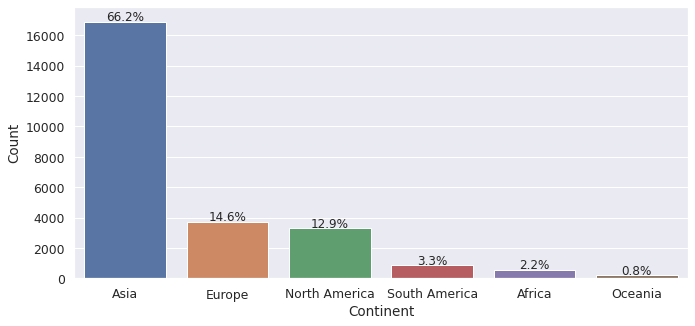

In [12]:
plt.figure(figsize = (11, 5));
cntplt = sns.countplot(data = df, x = 'continent', 
                       order = df.continent.value_counts().index.tolist());
countplot_labeling(cntplt, df);
plt.xlabel('Continent');
plt.ylabel('Count');
plt.ylim(0, 17900);

**`Education`**

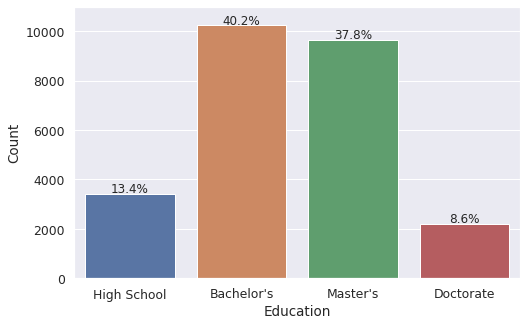

In [13]:
plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'education_of_employee', 
                       order = ['High School', 'Bachelor\'s', 'Master\'s', 'Doctorate']);
countplot_labeling(cntplt, df);
plt.xlabel('Education');
plt.ylabel('Count');
plt.ylim(0, 11000);

**`Job Experience`**

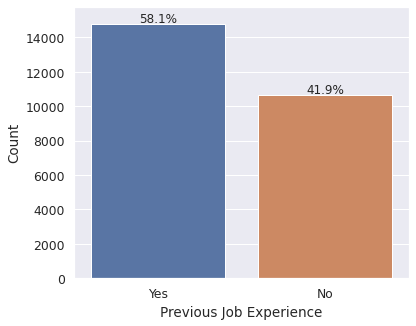

In [14]:
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'has_job_experience', order = ['Y', 'N']);
countplot_labeling(cntplt, df);
plt.xlabel('Previous Job Experience');
plt.ylabel('Count');
cntplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 15800);

**`Training Requirement`**

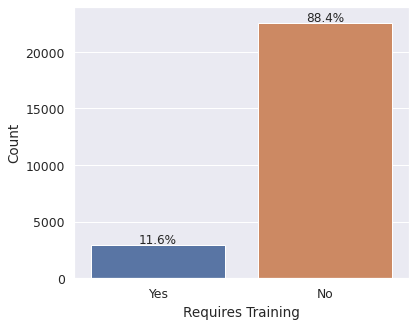

In [15]:
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'requires_job_training', order = ['Y', 'N']);
countplot_labeling(cntplt, df);
plt.xlabel('Requires Training');
plt.ylabel('Count');
cntplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 24000);

**`Region of Employment`**

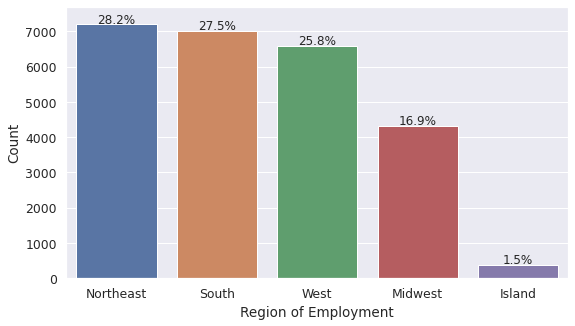

In [16]:
plt.figure(figsize = (9, 5));
cntplt = sns.countplot(data = df, x = 'region_of_employment', 
                       order = df.region_of_employment.value_counts().index.tolist());
countplot_labeling(cntplt, df);
plt.xlabel('Region of Employment');
plt.ylabel('Count');
plt.ylim(0, 7700);

**`Unit of Wage`**

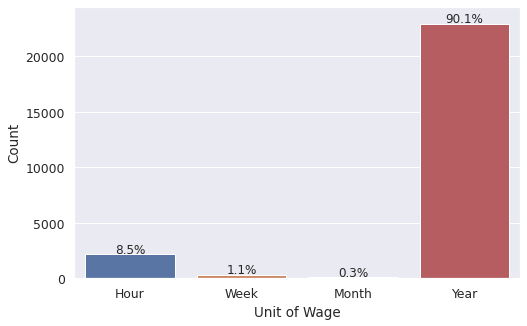

In [17]:
plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'unit_of_wage', 
                       order = ['Hour', 'Week', 'Month', 'Year']);
countplot_labeling(cntplt, df);
plt.xlabel('Unit of Wage');
plt.ylabel('Count');
plt.ylim(0, 24500);

**`Full-Time Position`**

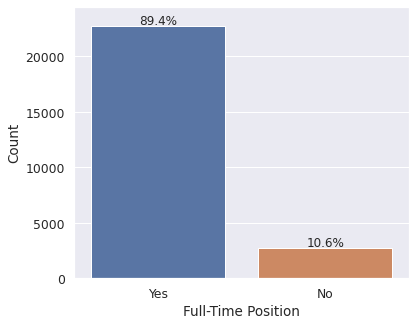

In [18]:
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'full_time_position', order = ['Y', 'N']);
countplot_labeling(cntplt, df);
plt.xlabel('Full-Time Position');
plt.ylabel('Count');
cntplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 24500);

**`Case Status`**

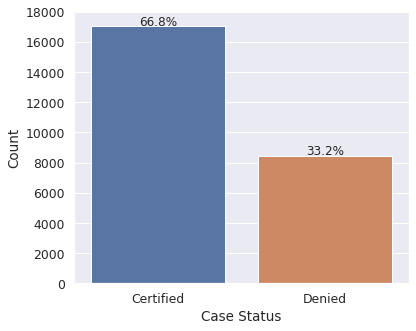

In [19]:
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'case_status', order = ['Certified', 'Denied']);
countplot_labeling(cntplt, df);
plt.xlabel('Case Status');
plt.ylabel('Count');
plt.ylim(0, 18000);

#### Observations from the Univariate Analysis of Categorical Variables:

*   66.2% of applicants come from Asia. Europe ranks as the second ***continent*** with 14.6%. Oceania is at the bottom of the list with 0.8%. 
*   40.2% of applicants hold Bachelor's and 37.8% of them own Master's, making them the top two frequent ***education levels*** among the applications. Only 8.6% of applicants have Doctorate, which is expected, as it's only needed for very specialized jobs.   
*   58.1% of applicants have previous ***job experience***, and only 11.6% of need ***job training***. 
*   Northeast is the most attractive ***region of employment*** for applicants (28.2%), which makes sense, with the vibrant financial sector being located in NYC. After that South and West rank no. 2 and 3, with 27.5% and 25.8%, respectively. The Island region (perhaps Hawaii, Puerto Rico, etc.) attracts only 1.5% of applicants, as only a small portion of US population live on islands.
*   For 90.1% of applications, the ***unit of wage*** is entered as year, and only for 0.3% and 1.1% of them, it is input as month and week, respectively.
*   89.4% of applications are for ***full-time positions***. 
*   66.8% of applications get ***certified***.




**`No. of Employees`**

In [20]:
# Checking all companies with less zero or negative no. of employees
print('No. of rows for which the no. of employees in the company is zero:', df.loc[df.no_of_employees == 0].shape[0])
print('No. of rows for which the no. of employees in the company is negative:', df.loc[df.no_of_employees < 0].shape[0], end = '\n'*2)

# Showing a sample of entries for which no. of employees is zero or
df.loc[df.no_of_employees < 0].sample(7)

No. of rows for which the no. of employees in the company is zero: 0
No. of rows for which the no. of employees in the company is negative: 33



,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17006,Asia,Doctorate,Y,N,-11,1984,West,25753.510,Year,Y,Denied
16883,North America,Bachelor's,Y,N,-26,1968,Northeast,168.156,Hour,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.950,Year,Y,Certified
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.320,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.940,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.140,Year,Y,Denied
15859,Asia,High School,N,N,-11,1969,South,44640.600,Year,Y,Denied


In [21]:
# Fixing the negative no. of employees by reversing their signs
df['no_of_employees'] = np.abs(df['no_of_employees'])

# Ensuring the change has been implemented properly
print('No. of rows with negative no. of employees (after modification):', df.loc[df.no_of_employees == 0].shape[0])

No. of rows with negative no. of employees (after modification): 0


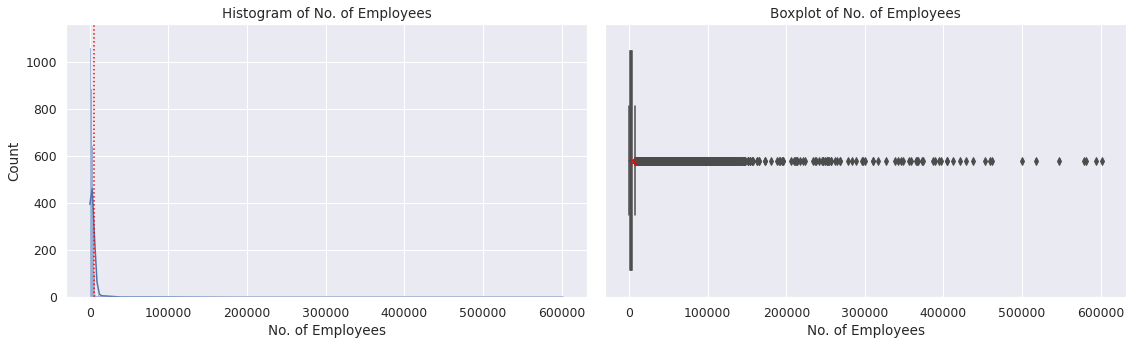

In [22]:
# Checking the distributions for all companies
plt.figure(figsize = (16, 5));
# Histogram
plt.subplot(121);
sns.histplot(data = df, x = 'no_of_employees', kde = True);
plt.axvline(df.no_of_employees.mean(), linestyle = ':', color = 'red');
plt.xlabel('No. of Employees');
plt.title('Histogram of No. of Employees');
# Boxplot
plt.subplot(122);
sns.boxplot(data = df, x = 'no_of_employees', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('No. of Employees');
plt.title('Boxplot of No. of Employees');
plt.tight_layout();

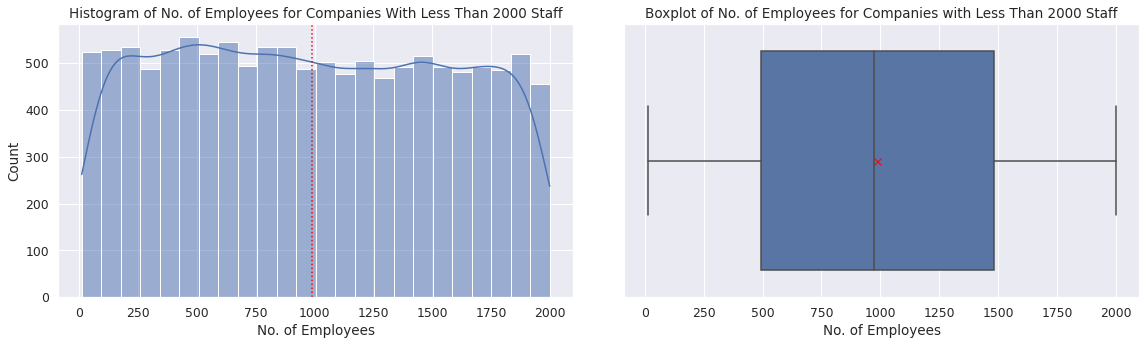

In [23]:
# Checking the distributions for companies with less than 2000 employees
plt.figure(figsize = (16.5, 5));
# Histogram
plt.subplot(121);
sns.histplot(data = df.loc[df.no_of_employees < 2000], x = 'no_of_employees', kde = True);
plt.axvline(df.loc[df.no_of_employees < 2000].no_of_employees.mean(), linestyle = ':', color = 'red');
plt.xlabel('No. of Employees');
plt.title('Histogram of No. of Employees for Companies With Less Than 2000 Staff');
# Boxplot
plt.subplot(122);
sns.boxplot(data = df.loc[df.no_of_employees < 2000], x = 'no_of_employees', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Establishment Year');
plt.xlabel('No. of Employees');
plt.title('Boxplot of No. of Employees for Companies with Less Than 2000 Staff');
plt.tight_layout(w_pad = -1);

**`Establishment Year`**

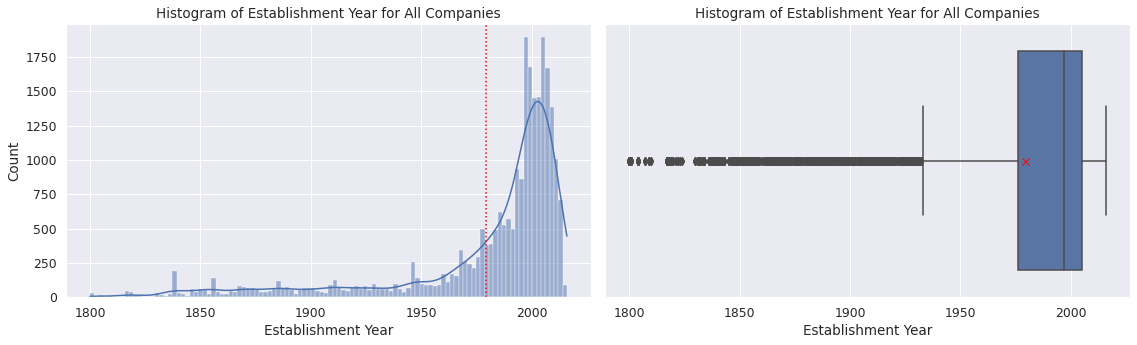

In [24]:
# Checking the distributions for all companies
plt.figure(figsize = (16, 5));
# Histogram
plt.subplot(121);
sns.histplot(data = df, x = 'yr_of_estab', kde = True);
plt.axvline(df.yr_of_estab.mean(), linestyle = ':', color = 'red');
plt.xlabel('Establishment Year');
plt.title('Histogram of Establishment Year for All Companies');
# Boxplot
plt.subplot(122);
sns.boxplot(data = df, x = 'yr_of_estab', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Establishment Year');
plt.title('Histogram of Establishment Year for All Companies');
plt.tight_layout();

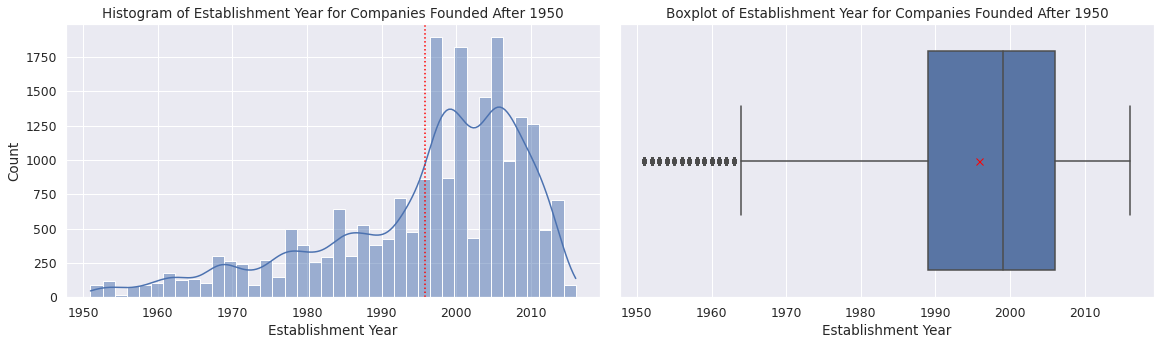

In [25]:
# Checking the distributions for companies established after 1950
plt.figure(figsize = (16.5, 5));
# Histogram
plt.subplot(121);
sns.histplot(data = df.loc[df.yr_of_estab > 1950], x = 'yr_of_estab', kde = True, bins = 40);
plt.axvline(df.loc[df.yr_of_estab > 1950].yr_of_estab.mean(), linestyle = ':', color = 'red');
plt.xlabel('Establishment Year');
plt.title('Histogram of Establishment Year for Companies Founded After 1950');
# Boxplot
plt.subplot(122);
sns.boxplot(data = df.loc[df.yr_of_estab > 1950], x = 'yr_of_estab', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Establishment Year');
plt.title('Boxplot of Establishment Year for Companies Founded After 1950');
plt.tight_layout(w_pad = -1);

**`Prevailing Wage`**

In [26]:
# Checking the no. of applicantions with prevailing wage <= 1000
print('The prevailing wage for {} ({}%) of applications is <= $1000.'.format(df.loc[df.prevailing_wage <= 1000].shape[0], 
                                            round(df.loc[df.prevailing_wage <= 1000].shape[0]/df.shape[0]*100, 2)))

The prevailing wage for 2267 (8.9%) of applications is <= $1000.


In [27]:
# Checking the unit wages of applicantions with prevailing wage <= 1000
print('Fraction of unit wage for applications whose prevailing wage <= $1000:')
df.loc[df.prevailing_wage <= 1000].unit_of_wage.value_counts(1)

Fraction of unit wage for applications whose prevailing wage <= $1000:


Hour    0.951
Year    0.049
Month   0.000
Week    0.000
Name: unit_of_wage, dtype: float64

#### Notes:

The vast majority of applications for which prevailing wage is less than or equal to $1000 are paid on an hourly basis, which makes sense, but a few of them are paid on an annual basis, which is strange. We don't speculate on what has caused this (entering wrong values, the employee is going to work very little hours in the given year, etc.) as it's really hard to figure out the real reason from the present data and, consequently, we don't alter/correct these values.

In [28]:
print('No. of applications for which prevailing wage is > $50K and the wage unit is week:',
      df.loc[(df.unit_of_wage == 'Week') & (df.prevailing_wage > 50000)].shape[0])

No. of applications for which prevailing wage is > $50K and the wage unit is week: 207


#### Notes:

*   It's really bizarre that 207 applications pay the employees $50K/week on average. Either they're intentional mistakes to increase the chance of certification, or high-paying management, consultant, etc. jobs or something else, it is quite hard to find out. Therefore, we choose to leave them at their current values. Anyways, weekly basis wages comprise only about 1% of the data.

*   There are several strange or counterintuitive things in the data, especially when it comes to wage and wage unit. Regardless, since determining the source of mistakes (or whether they're mistakes or actual data) is very difficult, so taking the absolute value of the negative no. of employees is going to be the only change we apply to the dataset.

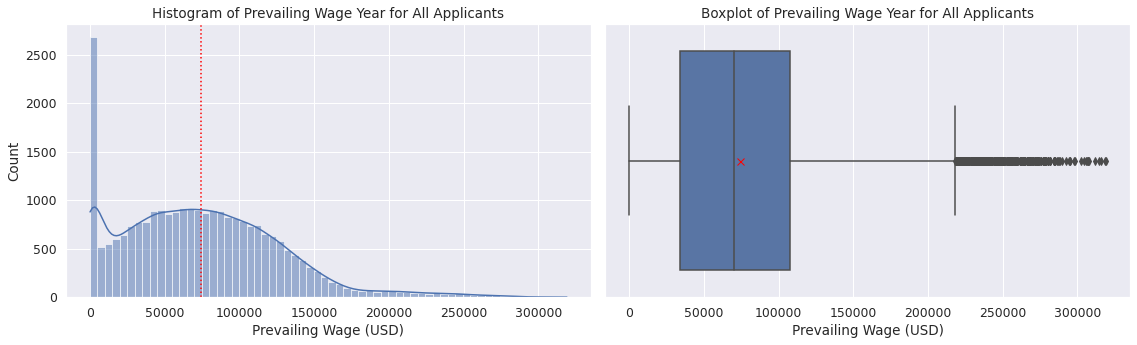

In [29]:
# Checking the distribution of prevailing wage for all applications
plt.figure(figsize = (16, 5));
# Histogram
plt.subplot(121);
sns.histplot(data = df, x = 'prevailing_wage', kde = True);
plt.axvline(df.prevailing_wage.mean(), linestyle = ':', color = 'red');
plt.xlabel('Prevailing Wage (USD)');
plt.title('Histogram of Prevailing Wage Year for All Applicants');
# Boxplot
plt.subplot(122);
sns.boxplot(data = df, x = 'prevailing_wage', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Prevailing Wage (USD)');
plt.title('Boxplot of Prevailing Wage Year for All Applicants');
plt.tight_layout();

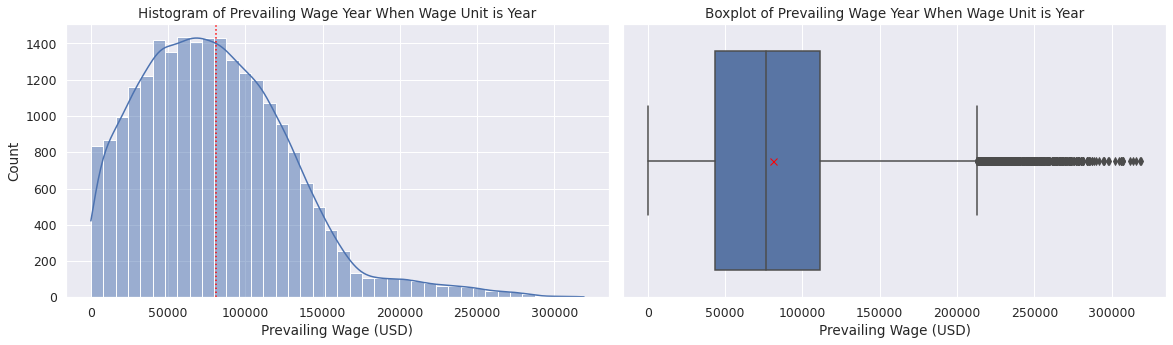

In [30]:
# Checking the distribution of prevailing wage when unit of wage is year
plt.figure(figsize = (16.5, 5));
# Histogram
plt.subplot(121);
sns.histplot(data = df.loc[df.unit_of_wage == 'Year'], x = 'prevailing_wage', kde = True, bins = 40);
plt.axvline(df.loc[df.unit_of_wage == 'Year'].prevailing_wage.mean(), linestyle = ':', color = 'red');
plt.xlabel('Prevailing Wage (USD)');
plt.title('Histogram of Prevailing Wage Year When Wage Unit is Year');
# Boxplot
plt.subplot(122);
sns.boxplot(data = df.loc[df.unit_of_wage == 'Year'], x = 'prevailing_wage', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Prevailing Wage (USD)');
plt.title('Boxplot of Prevailing Wage Year When Wage Unit is Year');
plt.tight_layout();

#### Observations from the Univariate Analysis of Numerical Variables:

*   Note that vertical dotted lines in the histograms and red crosses in the boxplots indicate the mean values.
*   For 33 entries, the ***no. of employees*** was originally negative. This was fixed by reversing the sign for these entries.
*   For small-scale companies (let's say, those with less than 2000 staff) the distribution of ***no. of employees*** is fairly uniform, and that's why the mean and median both fall around 1000. But overall, no. of employees has a huge variation, and is highly right-skewed, with many outliers to the right of the boxplot. But since they're fairly continuous, and reasonable (as they correspond to large businesses), no modification is implemented for this variable. 
*   ***Establishment year*** of companies spans over a wide range of 1800 to 2016. It's not very strange, as some US companies are quite old. Regardless, the vast majority of companies are relatively contemporary (e.g., 75% of them are built in 1976 or after), making the distribution of this variable very left-skewed. 
*   For newer companies (those establsihed after 1950), the distribution of ***Establishment year*** is still right-skewed (but less acutely), indicating the US business boom in the recent decades (especially after the tech boom of 90s). The mean and median estabslihment year for this subset of companies are ~1995 and 1999, respectively.      
*   For 8.9% of applications, the ***prevailing wage*** is $\leq$ 1000. In 95% of these cases, the wage unit is hour, so this is not shocking, but for 4.9% of them, the wage unit is year, which doesn't make much sense. Regardless, for the reasons discussed above, these counterintuitive observations, along with other oddities about prevailing wage pointed above, will be neglected.
*   The distributions of ***prevailing wage*** for the overall data and the subset of data for which the unit of wage is year, are fairly similar to each other (as for the vast majority of applications, the wage unit is year), meaning that they both are very right-skewed with mean and median relatively close to one another, and the KED of both peak a bit before the mean. The near-zero peak for the distribution of the whole data, specific to  hourly-basis wage units, vanishes in the subset distribution. The several outliers appearing on the right side of boxplots (whole or subset data) are continuous and reasonable, as some jobs might be management-level, etc. and thus very well-paying.
*   The distribution of ***prevailing wage*** when wage unit = hour, week or month could be plotted as well, but was avoided for the sake of brevity, and the fact that the vast majority of wage units are year. We'll compare the impact of the wage unit on the distribution of prevailing wage in more detail in the bivariate analysis section. 




### Bivariate Analysis

The current dataset contains many features, rendering the possibilities for bivariate analysis quite large. Therefore, we primarily limit our bivariate anaylysis to the understanding of the relationships between the more important parameters and the case status of the applicant, while being guided by the leading questions. 

**`Correlation Heatmap of Numerical Variables`**

In [31]:
# First let's create two new variables: age of company and numerical case status
df['age_of_company'] = 2022 - df['yr_of_estab']
df['case_status_num'] = df['case_status'].replace(['Denied', 'Certified'], [0, 1]) # 0 -> denied, 1 -> certified

df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_company,case_status_num
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied,15,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified,20,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied,14,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied,125,0
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified,17,1


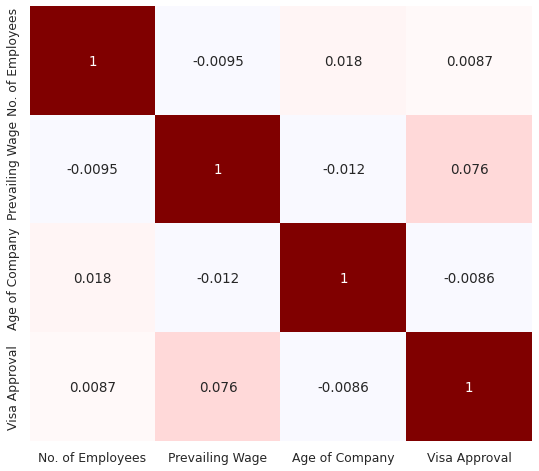

In [32]:
# Building a list of numerical columns
num_cols = df.select_dtypes(include = np.number).columns.tolist()
num_cols.remove('yr_of_estab')

# Demonstrating the correlations in the form of a heatmap
plt.figure(figsize = (9, 8));
corrmap = sns.heatmap(data = df[num_cols].corr(), annot = True, cbar = False, cmap = 'seismic', vmin = -1, vmax = 1);
corrmap.set_xticklabels(['No. of Employees', 'Prevailing Wage', 'Age of Company', 'Visa Approval']);
corrmap.set_yticklabels(['No. of Employees', 'Prevailing Wage', 'Age of Company', 'Visa Approval']);

#### Observations:

No strong correlation can be seen between any pairs of numerical variables, and between numerical variables and case status.

**`Case Status vs. Continent`**

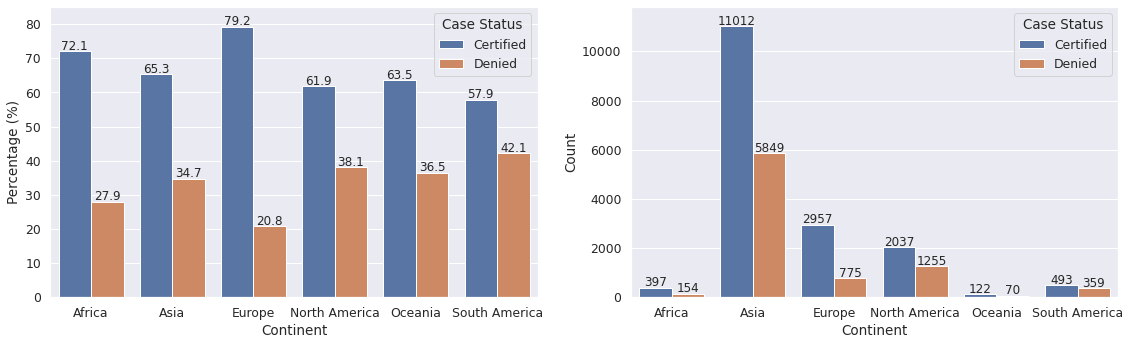

In [33]:
# Building a crosstab of continent and case status
ctab = pd.crosstab(df['continent'], df['case_status'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

plt.figure(figsize = (16, 5));
# Plotting crosstab in percentage form
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'continent', y = 'value', hue = 'case_status');
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Case Status');
plt.xlabel('Continent');
plt.ylabel('Percentage (%)');
plt.ylim(0, 85);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'continent', hue = 'case_status');
countplot_labeling(cntplt, df, perc = False);
plt.legend(title = 'Case Status');
plt.xlabel('Continent');
plt.ylabel('Count');
plt.ylim(0, 11800);
plt.tight_layout();

#### Observations:


*   European applicants have the highest probability of approval, while South American applicans have the lowest chance. 
*   The certification rate for all continents is above 50%.
*   The denial rate for Asian applicants is higher than that for Europeans and Africans. This is perhaps mainly associated with the fact that there are already many Asian workers in the US job market, and that the US government sets certain limits and quotas on the number of visas issued for a certain country.



**`Case Status vs. Education`**

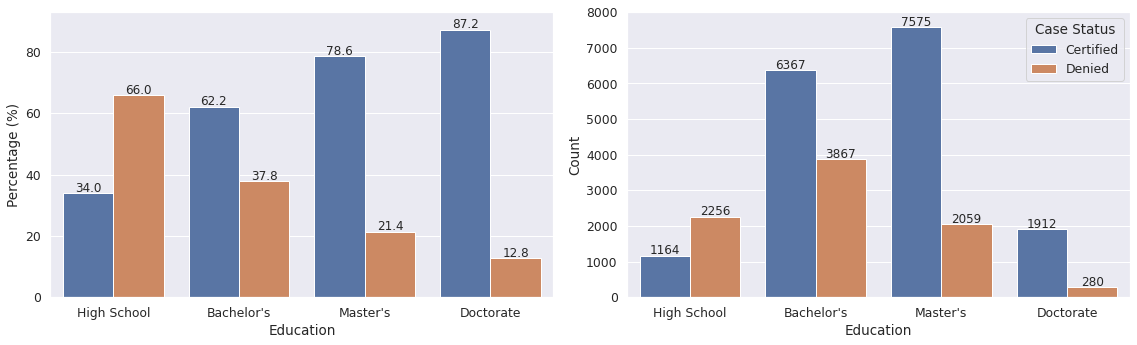

In [34]:
# Building a crosstab of education and case status
ctab = pd.crosstab(df['education_of_employee'], df['case_status'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

plt.figure(figsize = (16, 5));
# Plotting crosstab in percentage form
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'education_of_employee', y = 'value', hue = 'case_status',
                     order = ['High School', 'Bachelor\'s', 'Master\'s', 'Doctorate']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Case Status').set_visible(False);
plt.xlabel('Education');
plt.ylabel('Percentage (%)');
plt.ylim(0, 93);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'education_of_employee', hue = 'case_status',
                       order = ['High School', 'Bachelor\'s', 'Master\'s', 'Doctorate']);
countplot_labeling(cntplt, df, perc = False);
plt.legend(title = 'Case Status');
plt.xlabel('Education');
plt.ylabel('Count');
plt.ylim(0, 8000);
plt.tight_layout();

#### Observations:


*   The probability of certification rises steadily with the level of education.  
*   The approval rate for applicants with a doctorate degree is 87.2%, while only 34% of those with only a high-school diploma get certified. 



**`Case Status vs. Experience`**

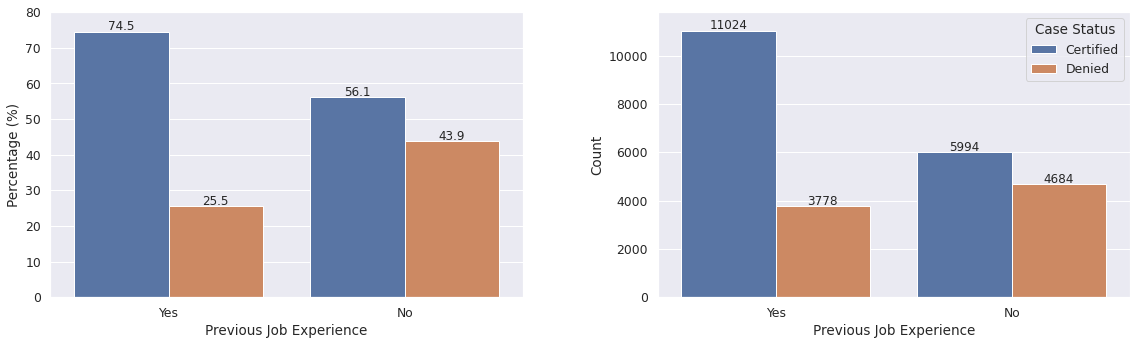

In [35]:
# Building a crosstab of job experience and case status
ctab = pd.crosstab(df['has_job_experience'], df['case_status'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

plt.figure(figsize = (16, 5));
# Plotting crosstab in percentage form
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'has_job_experience', y = 'value', hue = 'case_status',
                     order = ['Y', 'N']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Case Status').set_visible(False);
plt.xlabel('Previous Job Experience');
plt.ylabel('Percentage (%)');
barplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 80);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'has_job_experience', hue = 'case_status', order = ['Y', 'N']);
countplot_labeling(cntplt, df, perc = False);
plt.legend(title = 'Case Status');
plt.xlabel('Previous Job Experience');
plt.ylabel('Count');
cntplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 11800);
plt.tight_layout(w_pad = 5);

#### Observations:

While those with previous job experience have an 18.4% higher rate of approval, the approval rate even for those with no past job experience is still above 50%.  

**`Case Status vs. Training`**

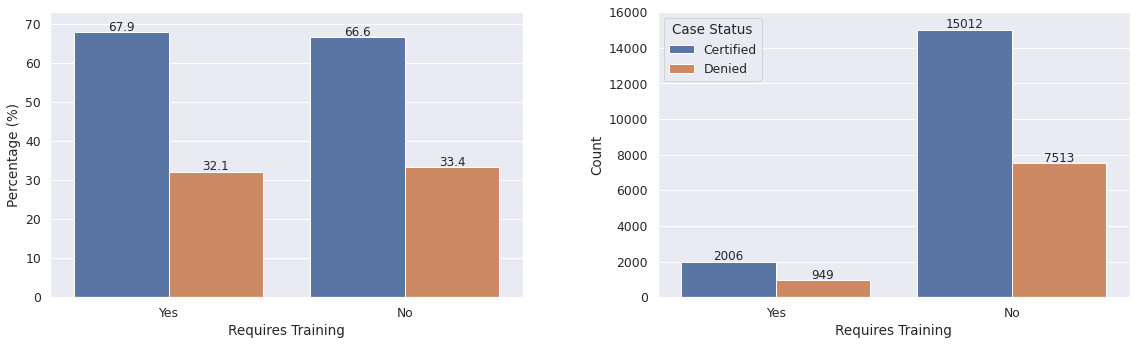

In [36]:
# Building a crosstab of job experience and case status
ctab = pd.crosstab(df['requires_job_training'], df['case_status'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

plt.figure(figsize = (16, 5));
# Plotting crosstab in percentage form
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'requires_job_training', y = 'value', hue = 'case_status',
                     order = ['Y', 'N']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Case Status').set_visible(False);
plt.xlabel('Requires Training');
plt.ylabel('Percentage (%)');
barplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 73);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'requires_job_training', hue = 'case_status', order = ['Y', 'N']);
countplot_labeling(cntplt, df, perc = False);
plt.legend(title = 'Case Status', loc = 'upper left');
plt.xlabel('Requires Training');
plt.ylabel('Count');
cntplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 16000);
plt.tight_layout(w_pad = 5);

#### Observations:

There is no substantial difference between the certification rates of those who do or do not need training. For both groups, the certification rate is about 2/3. 

**`Training vs. Experience`**

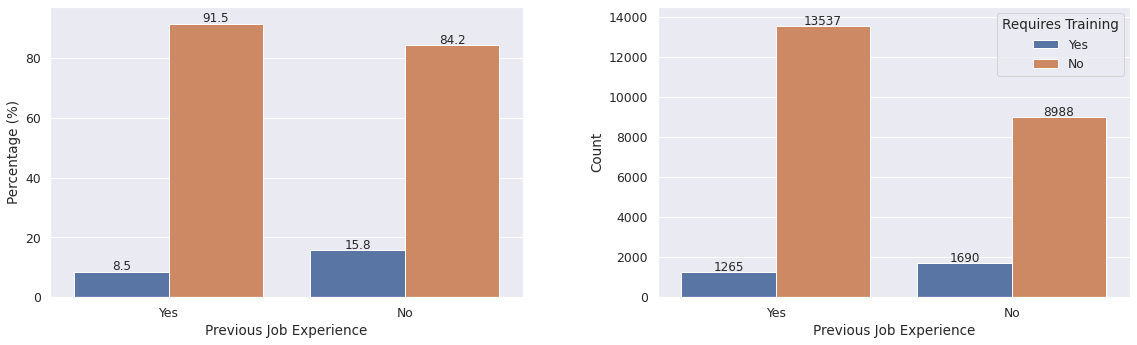

In [37]:
# Building a crosstab of job experience and training requirement
ctab = pd.crosstab(df['has_job_experience'], df['requires_job_training'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

plt.figure(figsize = (16, 5));
# Plotting crosstab in percentage form
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'has_job_experience', y = 'value', hue = 'requires_job_training',
                     order = ['Y', 'N'], hue_order = ['Y', 'N']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Case Status').set_visible(False);
plt.xlabel('Previous Job Experience');
plt.ylabel('Percentage (%)');
barplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 97);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'has_job_experience', hue = 'requires_job_training', 
                       order = ['Y', 'N'], hue_order = ['Y', 'N']);
countplot_labeling(cntplt, df, perc = False);
plt.legend(title = 'Requires Training', loc = 'upper right', labels = ['Yes', 'No']);
plt.xlabel('Previous Job Experience');
plt.ylabel('Count');
cntplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 14500);
plt.tight_layout(w_pad = 5);

#### Observations:

On average, the need for training increases from 8.5% to 15.8% when an applicant doesn't have any job experience, but regardless, the vast majority of people with no job experience in the past still do not need training.

**`Case Status vs. Full-Time Position`**

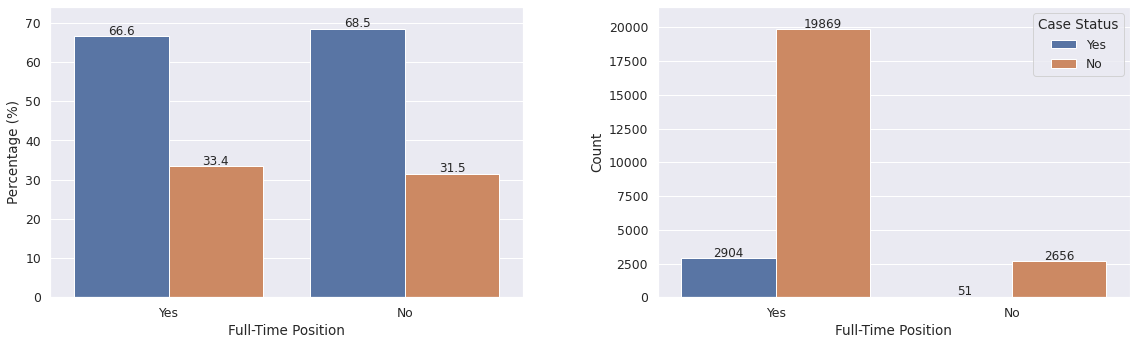

In [38]:
# Building a crosstab of full-time position and case status
ctab = pd.crosstab(df['full_time_position'], df['case_status'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

plt.figure(figsize = (16, 5));
# Plotting crosstab in percentage form
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'full_time_position', y = 'value', hue = 'case_status',
                     order = ['Y', 'N']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Case Status').set_visible(False);
plt.xlabel('Full-Time Position');
plt.ylabel('Percentage (%)');
barplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 74);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'full_time_position', hue = 'requires_job_training', 
                       order = ['Y', 'N'], hue_order = ['Y', 'N']);
countplot_labeling(cntplt, df, perc = False);
plt.legend(title = 'Case Status', loc = 'upper right', labels = ['Yes', 'No']);
plt.xlabel('Full-Time Position');
plt.ylabel('Count');
cntplt.set_xticklabels(['Yes', 'No']);
plt.ylim(0, 21500);
plt.tight_layout(w_pad = 5);

#### Observations:

Although applicants for part-time positions have ~ 2% higher chance of getting certified, the approval rate for both groups (applicants for full-time/part-time positions) is around 2/3.

**`Case Status vs. Region`**

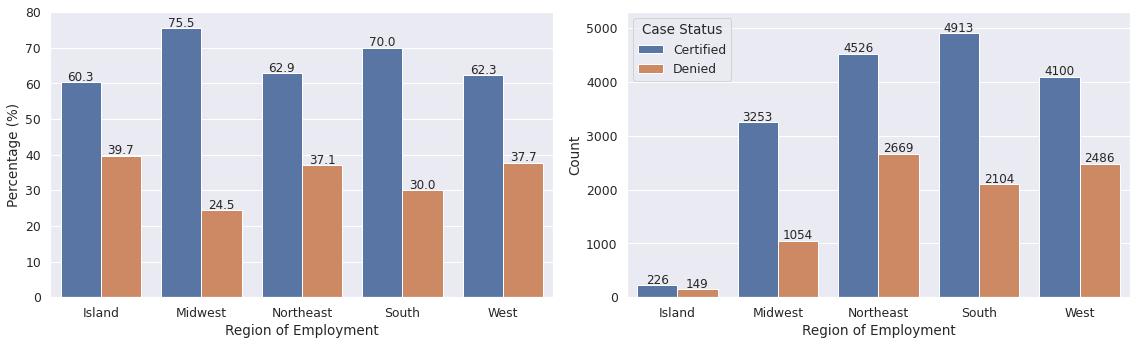

In [39]:
# Building a crosstab of region of employment and case status
ctab = pd.crosstab(df['region_of_employment'], df['case_status'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

plt.figure(figsize = (16, 5));
# Plotting crosstab in percentage form
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'region_of_employment', y = 'value', hue = 'case_status');
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Case Status').set_visible(False);
plt.xlabel('Region of Employment');
plt.ylabel('Percentage (%)');
plt.ylim(0, 80);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'region_of_employment', hue = 'case_status');
countplot_labeling(cntplt, df, perc = False);
plt.legend(title = 'Case Status');
plt.xlabel('Region of Employment');
plt.ylabel('Count');
plt.ylim(0, 5300);
plt.tight_layout();

#### Observations:

*   The certification rate for positions located in island region is slightly lower than the others, perhaps since these are closed communities with lesser need of foreign workers. On the other hand, applicants going to Midwest have a higher chance of getting approved, maybe due to manufacturing jobs in this region or since the region is less competitive and attractive than Pacific West (CA) and Northeast (NY) for domestic job applicants. 
*   Although Midwest somewhat stands out, overall, there is not much differenc ebetween the approval rates of various regions.

**`Education vs. Region`**

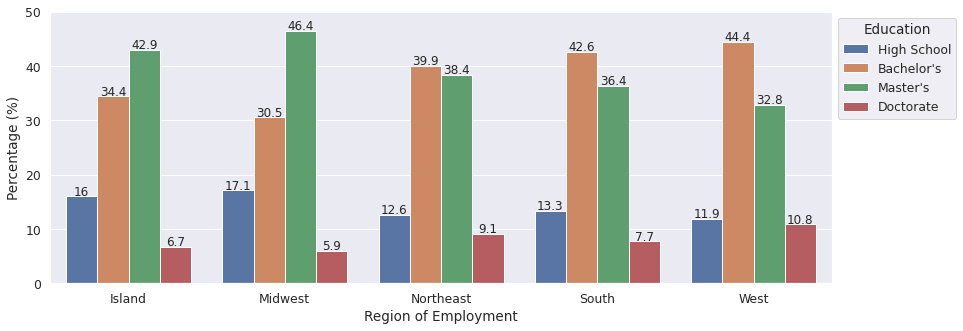

In [40]:
# Building a crosstab of region of employment and education level
ctab = pd.crosstab(df['region_of_employment'], df['education_of_employee'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (14, 5));
barplt = sns.barplot(data = ctab_df, x = 'region_of_employment', y = 'value', hue = 'education_of_employee',
                     hue_order = ['High School', 'Bachelor\'s', 'Master\'s', 'Doctorate']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Education', bbox_to_anchor = [1, 1]);
plt.xlabel('Region of Employment');
plt.ylabel('Percentage (%)');
plt.ylim(0, 50);

#### Observations:

*   Interestingly, the most popular education level between applicants for island or Midwest positions is Master's. 
*   Doctorate holders have a somewhat higher share among applicants in West and Northeast regions (compared to the other three regions),perhaps due to the tech and financial jobs in the two areas, respectively.  

**`Case Status vs. Unit of Wage`**


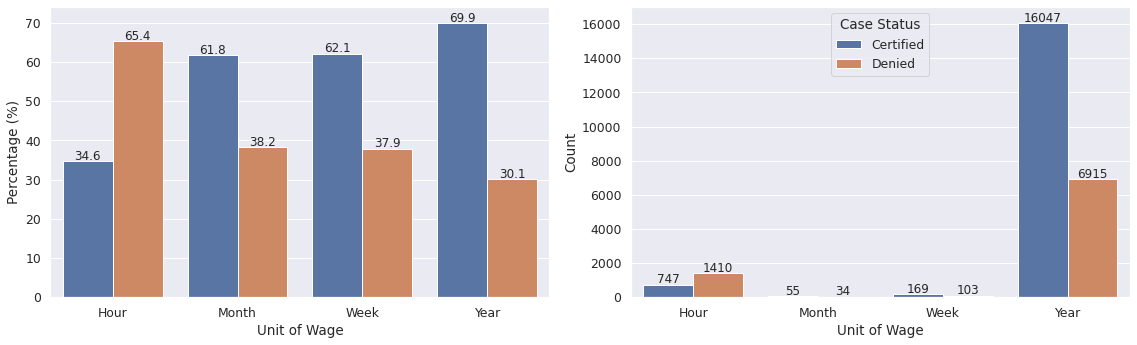

In [41]:
# Building a crosstab of wage unit and case status
ctab = pd.crosstab(df['unit_of_wage'], df['case_status'], normalize = 'index')
# Converting crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
# Converting fractions into percentages
ctab_df['value'] = ctab_df['value']*100

plt.figure(figsize = (16, 5));
# Plotting crosstab in percentage form
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'unit_of_wage', y = 'value', hue = 'case_status');
countplot_labeling(barplt, ctab_df, perc = False);
plt.legend(title = 'Case Status').set_visible(False);
plt.xlabel('Unit of Wage');
plt.ylabel('Percentage (%)');
plt.ylim(0, 74);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'unit_of_wage', hue = 'case_status');
countplot_labeling(cntplt, df, perc = False);
plt.legend(loc = 'upper center', title = 'Case Status');
plt.xlabel('Unit of Wage');
plt.ylabel('Count');
plt.ylim(0, 17000);
plt.tight_layout();

#### Observations:

*   The denial rate among hourly wage workers is quite high (65.4%), most likely since applicants to the corresponding jobs might also have lower levels of education, the job is low-paying, doesn't need much expertise and it can be filled with domestic workers fairly easily.
*   The denial rate for other wage units are fairly close to each other and much less than 50%. 
*   As expected, the approval rate constantly grows when wage unit changes from hour, to week, month and year. The positions corresponding to an annual-basis income have the highest probability of approval, as they usually correspond to higher-paying and more specialized jobs.

**`Prevailing Wage vs. Unit of Wage`**

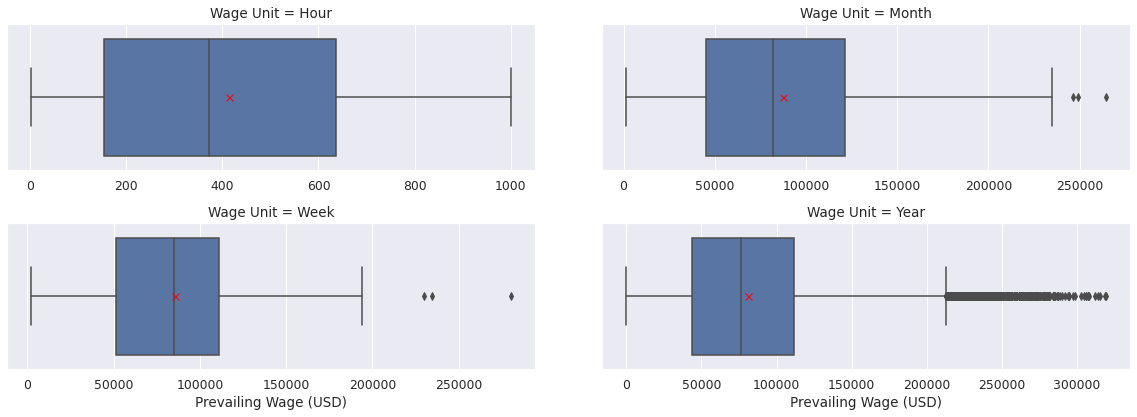

In [42]:
# Boxplot of prevailing wage wrt wage unit
plt.figure(figsize = (16, 6));
# Looping over all wage units
for i, unit in enumerate(sorted(df.unit_of_wage.unique().tolist())):
    plt.subplot(2,2,i+1);
    sns.boxplot(data = df.loc[df['unit_of_wage'] == unit], x = 'prevailing_wage', showmeans = True,
                meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
    if i > 1:
      plt.xlabel('Prevailing Wage (USD)');
    else:
      plt.xlabel('');
    plt.title('Wage Unit = ' + unit);
plt.tight_layout(w_pad = 5, h_pad = 1);

#### Observations:

*   The mean and median of applications corresponding to hourly wage unit have much lower prevailing wages. This is fully expected as the wages of these jobs are calculated on an hourly basis.
*  Oddly, the boxplots of prevailing wages for weekly and monthly wage units are fairly similar to those of yearly wage unit, and nearly cover the same range. In fact, the mean and median prevailing wages for both weekly and monthly wage-unit categories are slightly higher than those of annual wage unit.   
*  Either there are some intentional/unintentional mistakes in prevailing wages corresponding to weekly and monthly units, or some of the numbers have been calculated on an annual basis but will be later paid to employee on a weekly/monthly basis, is very hard to figure out from the present data, and this is why we choose not to alter any of these numbers.    

**`Prevailing Wage vs. Region of Employment`**

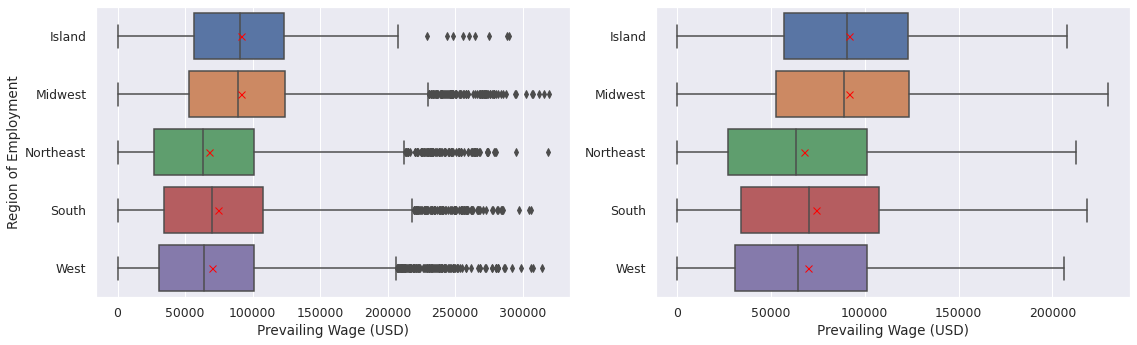

In [43]:
# Boxplot of prevailing wage wrt unit of wage
plt.figure(figsize = (16, 5));
# Outliers
plt.subplot(121);
bxplt1 = sns.boxplot(data = df, x = 'prevailing_wage', y = 'region_of_employment', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Prevailing Wage (USD)');
plt.ylabel('Region of Employment');
# No outliers
plt.subplot(122);
bxplt2 = sns.boxplot(data = df, x = 'prevailing_wage', y = 'region_of_employment', showmeans = True, showfliers = False,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Prevailing Wage (USD)');
plt.ylabel('');
plt.tight_layout();

#### Observations:

The mean and median of prevailing wage for Island and Midwest regions hover around \$90K, while the mean of median of prevailing wage in the other three regions fluctuate around \$70K.

**`Case Status vs. Prevailing Wage`**

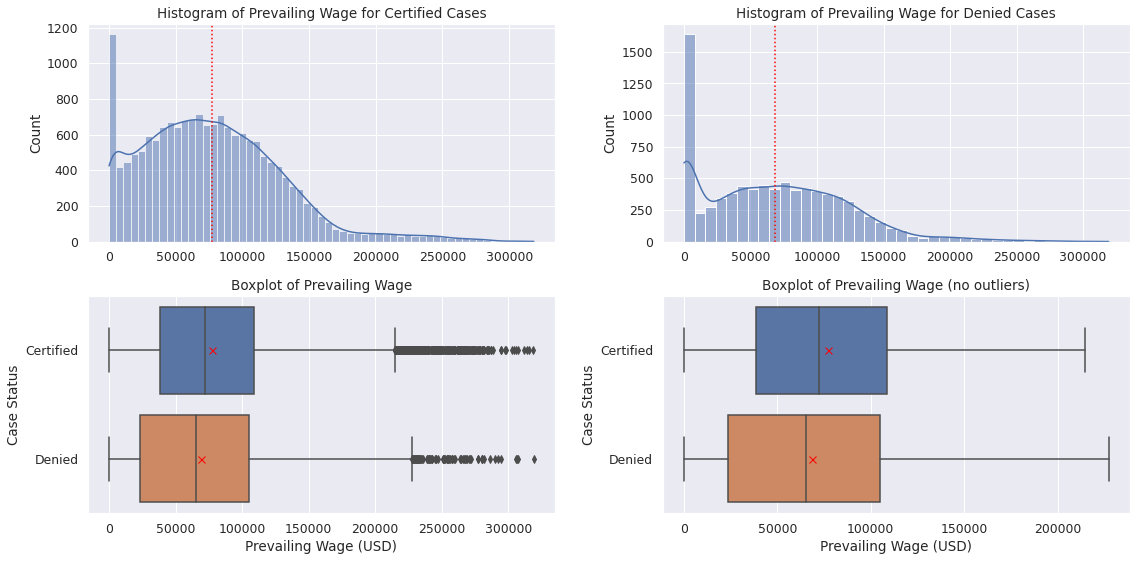

In [44]:
# Distribution of prevailing wage wrt case status
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df['case_status'] == 'Certified'], x = 'prevailing_wage', kde = True);
plt.axvline(df.loc[df['case_status'] == 'Certified'].prevailing_wage.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of Prevailing Wage for Certified Cases');
plt.subplot(222);
sns.histplot(data = df.loc[df['case_status'] == 'Denied'], x = 'prevailing_wage', kde = True);
plt.axvline(df.loc[df['case_status']== 'Denied'].prevailing_wage.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of Prevailing Wage for Denied Cases');
# Boxplots
plt.subplot(223);
sns.boxplot(data = df, x = 'prevailing_wage', y = 'case_status', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Prevailing Wage (USD)');
plt.ylabel('Case Status');
plt.title('Boxplot of Prevailing Wage');
plt.subplot(224);
sns.boxplot(data = df, x = 'prevailing_wage', y = 'case_status', showmeans = True, showfliers = False,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Prevailing Wage (USD)');
plt.ylabel('Case Status');
plt.title('Boxplot of Prevailing Wage (no outliers)');
plt.tight_layout(w_pad = 2);

#### Observations:

Overall shapes of the prevailing wage PDF (and boxplot) for both certified and denied applications are very similar, with the minor difference that the mean and median values for the prevailing wages of denied applications are somewhat (~ 10%) lower. 

**`Case Status vs. Age of Company`**

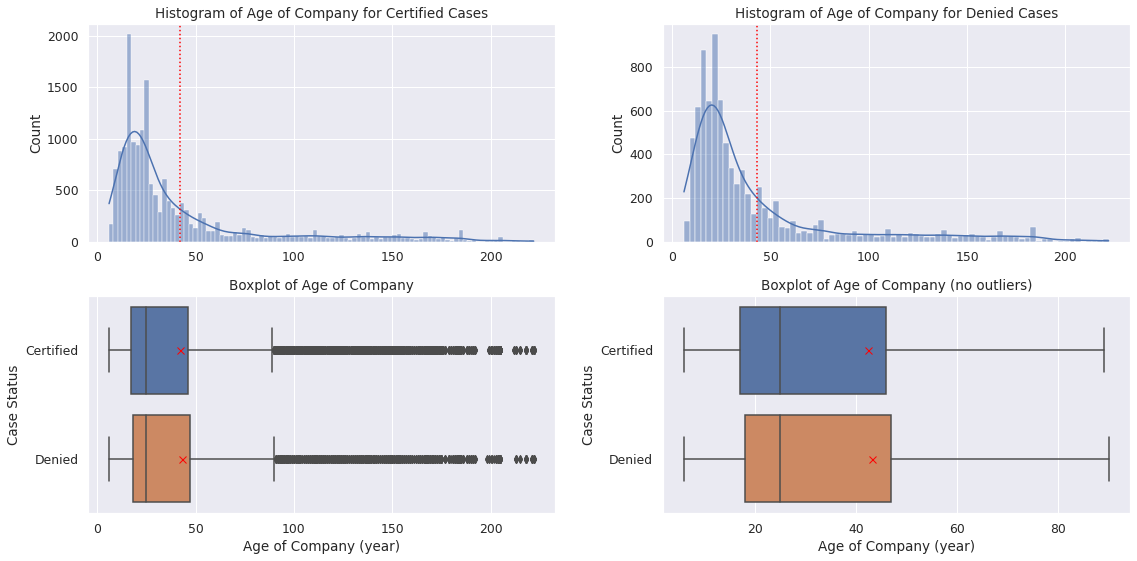

In [45]:
# Distribution of age of company wrt case status
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df['case_status'] == 'Certified'], x = 'age_of_company', kde = True);
plt.axvline(df.loc[df['case_status'] == 'Certified'].age_of_company.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of Age of Company for Certified Cases');
plt.subplot(222);
sns.histplot(data = df.loc[df['case_status'] == 'Denied'], x = 'age_of_company', kde = True);
plt.axvline(df.loc[df['case_status']== 'Denied'].age_of_company.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of Age of Company for Denied Cases');
# Boxplots
plt.subplot(223);
sns.boxplot(data = df, x = 'age_of_company', y = 'case_status', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Age of Company (year)');
plt.ylabel('Case Status');
plt.title('Boxplot of Age of Company');
plt.subplot(224);
sns.boxplot(data = df, x = 'age_of_company', y = 'case_status', showmeans = True, showfliers = False,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Age of Company (year)');
plt.ylabel('Case Status');
plt.title('Boxplot of Age of Company (no outliers)');
plt.tight_layout(w_pad = 2);

#### Observations:

The distribution of age of company barely changes between denied and certified cases (all the way up to means and medians), indicating that these two variables are almost decoupled from each other. 

**`Case Status vs. No. of Employees`**

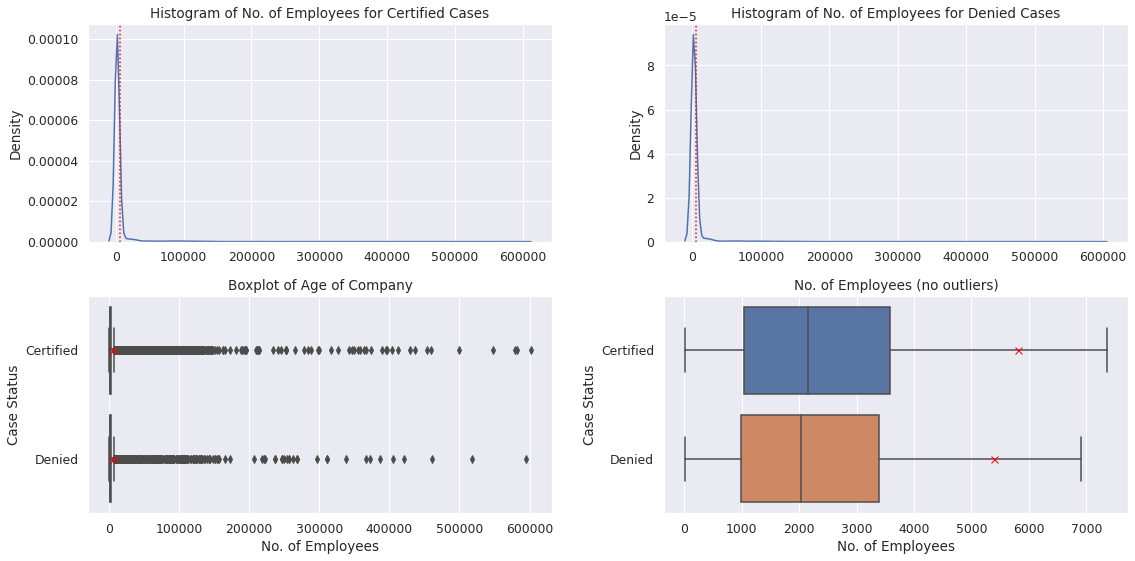

In [46]:
# Distribution of no. of employees in the company wrt case status
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.kdeplot(data = df.loc[df['case_status'] == 'Certified'], x = 'no_of_employees');
plt.axvline(df.loc[df['case_status'] == 'Certified'].no_of_employees.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of No. of Employees for Certified Cases');
plt.subplot(222);
sns.kdeplot(data = df.loc[df['case_status'] == 'Denied'], x = 'no_of_employees');
plt.axvline(df.loc[df['case_status']== 'Denied'].no_of_employees.mean(), linestyle = ':', color = 'red');
plt.xlabel('');
plt.title('Histogram of No. of Employees for Denied Cases');
# Boxplots
plt.subplot(223);
sns.boxplot(data = df, x = 'no_of_employees', y = 'case_status', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('No. of Employees');
plt.ylabel('Case Status');
plt.title('Boxplot of Age of Company');
plt.subplot(224);
sns.boxplot(data = df, x = 'no_of_employees', y = 'case_status', showmeans = True, showfliers = False,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('No. of Employees');
plt.ylabel('Case Status');
plt.title('No. of Employees (no outliers)');
plt.tight_layout(w_pad = 2);

#### Observations:

The distribution of no. of employees between the denied and certified applications remains nearly the same, except for the fact that certified cases on average correspond to slightly larger companies (~ 7%).  

## Data Preprocessing

*   **Missing value treatment**: As established before, the dataset doesn't have any missing values, therefore it doesn't require any forms of missing value treatment. The only feature with implausible values was 'no_of_employees' for which we chose to change the sign of negative values. 

*  **Feature engineering**: We do not engineer any new feature beyond the age of company that we did in the bivariate analysis section, but we'll drop the overlapping features. ('yr_of_estab' overlaps with 'age_of_company' and 'case_status' with 'case_status_num'). We also will convert some of the categorical variables with natural order into numerical ones.

*   **Outlier detection and treatment**: We will further examine the presence of outliers in numerical variables, and will decide whether any treatments is necessary, or these values are natural and expected. 




### Feature Engineering 

In [47]:
# Dropping case_status and yr_of_estab features
df_model = df.drop(columns = ['yr_of_estab', 'case_status'], axis = 1)
# Renaming case_status_num
df_model.rename(columns = {'case_status_num': 'case_status'}, inplace = True)

# Replacing classes in naturally ordered features with numbers
df_model['education_of_employee'] = df_model['education_of_employee'].replace(
                                     ['High School', 'Bachelor\'s', 'Master\'s', 'Doctorate'], np.arange(1, 5))
df_model['unit_of_wage'] = df_model['unit_of_wage'].replace(
                                     ['Hour', 'Week', 'Month', 'Year'], np.arange(1, 5))
df_model.head(3)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,age_of_company,case_status
0,Asia,1,N,N,14513,West,592.203,1,Y,15,0
1,Asia,3,Y,N,2412,Northeast,83425.650,4,Y,20,1
2,Asia,2,N,Y,44444,West,122996.860,4,Y,14,0


### Outlier Check 

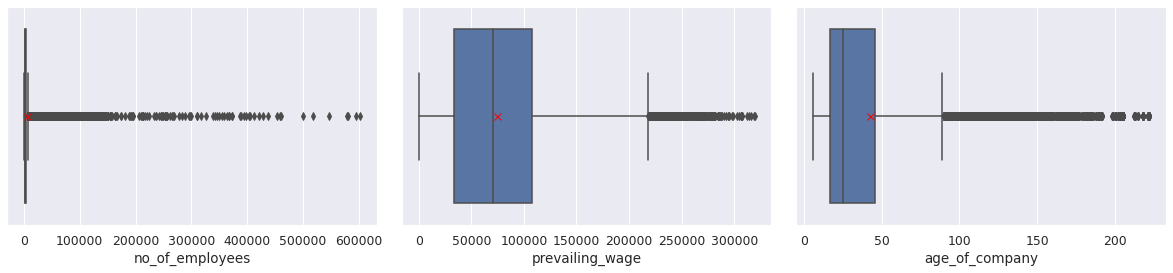

In [48]:
# Listing all numerical columns
num_cols = df.select_dtypes(include = np.number).columns.tolist()
num_cols.remove('yr_of_estab')
num_cols.remove('case_status_num')

# Plotting the boxplot of all numerical vars except case status (which only has two numbers)
plt.figure(figsize = (16.5, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1);
    sns.boxplot(data = df, x = col, showmeans = True, 
                meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.tight_layout();

#### Observations:

*   Although all numerical variables have many outliers on the right side of their boxplots, overall, none of the outliers are outside the norm and unexpected, and relative continuity can be detected for all variables. Note that some US companies have been established many decades or a few centuries ago, large companies might have several hundreds of thousands of employees, and prevailing wages $\gtrsim$ 300K aren't odd. Of course some of the wages weren't fully compatible with the wage unit, but as discussed before, we choose not to alter them.
*   Note that analysis of 'age_of_company' also covers the overlapping variable 'yr_of_estab', and the target variable ('case_status_num') wasn't analyzed, since it only takes two values. 

## Post-Imputation EDA

We didn't conduct any imputation or outlier treatment, except for changing the sign of negative entries of 'no_of_employees', making this section practically irrelevant and unnecessary. 

## Building Classification Models

*   Here, we use two parallel (***Bagging*** and ***Random Forest***) and two sequential (***Adaptive Boosting*** and ***Gradient Boosting***) ensemble techniques to construct ML-based models capable of sifting certified applications from denied applications. All these models will also be compared against a decision tree model and a stacking classifier built using all of them. 

*   Due to its massive computational costs, XGBoost will be avoided, excpet as the meta-classifier of the stacking model.

*   Here, we select ***F1-score*** to evaluate the performance of all models, since we neither seek to miscategorize the underqualified applications that should be denied, nor do we aim to throw out applications of eligible candidates whose presence in the US job market is essential for economic growth.   

*   Since the identification of both classes matters nearly equally to us (hence, the choice of F1-score as the performance metric), we will use ***balanced class weights*** even for untuned models, if the model provides the relevant hyperparameter. 

In [49]:
# Auxiliary function for evaluation of model's performance

def model_eval(model, X_train, X_test, y_train, y_test):
    '''This function calculates all relevant performance metrics of a classification
    model on training and testing data, and returns them in the form of a dataframe.'''
    
    # Reconstructing the training set
    y_recon = model.predict(X_train)
    # Making prediction for training set
    y_pred = model.predict(X_test)
    # Making the performance metrics dataframe 
    model_perform = pd.DataFrame(index = ['Train', 'Test'], columns = ['Accuracy', 
                                                    'Recall', 'Precision', 'F1', 'Specificity'])
    # Calculating the performance metrics on training set
    model_perform.iloc[0, :] = [accuracy_score(y_train, y_recon), recall_score(y_train, y_recon),
                                precision_score(y_train, y_recon), f1_score(y_train, y_recon),
                                recall_score(y_train, y_recon, pos_label = 0)]
    # Calculating the performance metrics on testing set
    model_perform.iloc[1, :] = [accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                                precision_score(y_test, y_pred), f1_score(y_test, y_pred),
                                recall_score(y_test, y_pred, pos_label = 0)]
    return model_perform

In [50]:
# Generating the confusion matrix for classification models

def confusion_matrix_plot(y_truth, y_pred):
    '''This function generates a 2*2 heatmap representing the confusion matrix of
    actual data and predictions.'''

    # Calculating the confusion matrix
    cm = confusion_matrix(y_truth, y_pred)
    # Converting the confusion matrix into a dataframe
    cm_df = pd.DataFrame(cm, index = ['Truth - Denied', 'Truth - Certified'],
                         columns = ['Prediction - Denied', 'Prediction - Certified'])
    
    # Generating labels for the confusion matrix heatmap
    labels = []
    for i in range(len(cm.flatten())):
        labels.append(str(cm.flatten()[i]) + '\n(' + 
                      str(np.round(cm.flatten()[i]/cm.flatten().sum()*100, 2)) + '%)')
    labels = np.asarray(labels).reshape(2, 2)
    
    # Plotting the heatmap     
    sns.heatmap(data = cm_df, annot = labels, fmt = '', cmap = 'seismic', cbar = False,
                vmin = -len(y_truth), vmax = len(y_truth))
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

### Building Training and Testing Sets

In [51]:
# Separating predictors from target
y = df_model['case_status']
X = df_model.drop(columns = 'case_status', axis = 1)
# Converting categories into dummy variables
X = pd.get_dummies(X, columns = X.select_dtypes(include = 'category').columns.tolist(), drop_first = True)
# Building training and testing sets (0.75:0.25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25, stratify = y)

In [52]:
# Ensuring classes are distributed with the same proportion between train and test
print('Class distribution for training set:\n', y_train.value_counts(1), sep = '', end = '\n'*2)
print('Class distribution for testing set:\n', y_test.value_counts(1), sep = '')

Class distribution for training set:
1   0.668
0   0.332
Name: case_status, dtype: float64

Class distribution for testing set:
1   0.668
0   0.332
Name: case_status, dtype: float64


### Decision Tree

In [53]:
# Building the initial model (full tree)
dtr0 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1)
dtr0 = dtr0.fit(X_train, y_train)

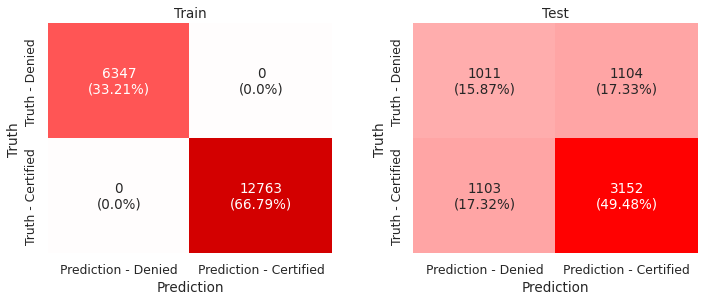

In [54]:
# Confusion matrix of the initial model (full tree)

# Reconstructing the training data
y_recon = dtr0.predict(X_train);
# Forecasting the testing data
y_pred = dtr0.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
confusion_matrix_plot(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.title('Test');
plt.tight_layout(w_pad = 3);

In [55]:
# Evaluating the performance of the initial model (full tree) on training and testing sets
dtr0_perform = model_eval(dtr0, X_train, X_test, y_train, y_test)
dtr0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,1.000,1.000,1.000,1.000,1.000
Test,0.654,0.741,0.741,0.741,0.478


In [56]:
# Tuning the initial model (full tree)

# Defining the base model
base_model = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
               'max_depth': np.arange(3, 10), 'max_leaf_nodes': [2, 5, 10, 20],
               'min_samples_split': [4, 8, 15, 30], 'min_impurity_decrease': [1e-4, 1e-3, 0.01]}

# Setting the accuracy criterion
acc_criterion = make_scorer(f1_score)

# Searching over all hyperparameters
all_models = GridSearchCV(base_model, param_grid = hyperparams, scoring = acc_criterion, cv = 5)
all_models = all_models.fit(X_train, y_train)

# Selecting the best model
dtr_tuned = all_models.best_estimator_ 
dtr_tuned = dtr_tuned.fit(X_train, y_train)
dtr_tuned

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_split=4,
                       random_state=1, splitter='random')

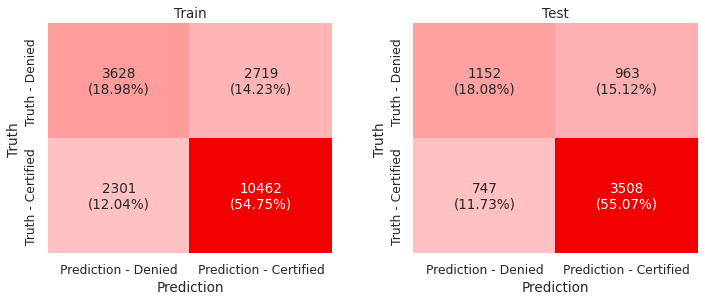

In [57]:
# Confusion matrix of the tuned model (pre-pruned tree)

# Reconstructing the training data
y_recon = dtr_tuned.predict(X_train);
# Forecasting the testing data
y_pred = dtr_tuned.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
confusion_matrix_plot(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.title('Test');
plt.tight_layout(w_pad = 3);

In [58]:
# Evaluating the performance of the tuned model (pre-pruned tree) on training and testing sets
dtr_tuned_perform = model_eval(dtr_tuned, X_train, X_test, y_train, y_test)
dtr_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.737,0.820,0.794,0.807,0.572
Test,0.732,0.824,0.785,0.804,0.545


#### Observations:

*   However all the performance metrics of the initial tree (full tree) on the training set are at 100%, there is a massive performance drop from the training to testing set, which is a clear sign of overfitting.

*   The tuned tree significantly closes the gap between the performance scores on the training and testing data, and improves the performance on the testing set.

### Bagging Classifier

In [59]:
# Building the initial model (bagging classifier)
bgc0 = BaggingClassifier(base_estimator = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1),
                         random_state = 1)
bgc0 = bgc0.fit(X_train, y_train) 

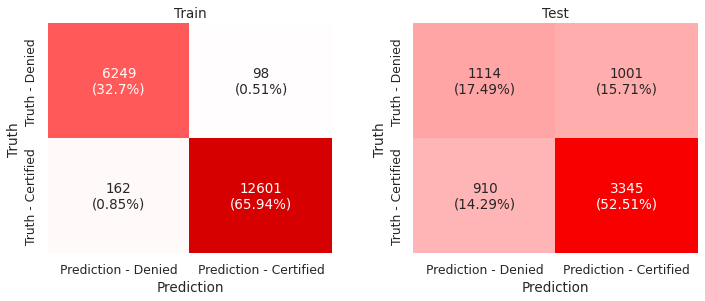

In [60]:
# Confusion matrix of the initial model (untuned bagging classifier)

# Reconstructing the training data
y_recon = bgc0.predict(X_train);
# Forecasting the testing data
y_pred = bgc0.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
confusion_matrix_plot(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.title('Test');
plt.tight_layout(w_pad = 3);

In [61]:
# Evaluating the performance of the initial model (untuned bagging classifier) on training and testing sets
bgc0_perform = model_eval(bgc0, X_train, X_test, y_train, y_test)
bgc0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.986,0.987,0.992,0.990,0.985
Test,0.700,0.786,0.770,0.778,0.527


In [62]:
# Tuning the initial model (bagging classifier)

# Defining the base model
base_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1),
                               random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'n_estimators': [10, 30, 75, 150, 250],
               'max_samples': np.arange(0.5, 1.1, 1), 'max_features': np.arange(0.5, 1.1, 1)}

# Setting the accuracy criterion
acc_criterion = make_scorer(f1_score)

# Searching over all hyperparameters
all_models = GridSearchCV(base_model, param_grid = hyperparams, scoring = acc_criterion, cv = 5)
all_models = all_models.fit(X_train, y_train)

# Selecting the best model
bgc_tuned = all_models.best_estimator_ 
bgc_tuned = bgc_tuned.fit(X_train, y_train)
bgc_tuned

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  max_features=0.5, max_samples=0.5, n_estimators=150,
                  random_state=1)

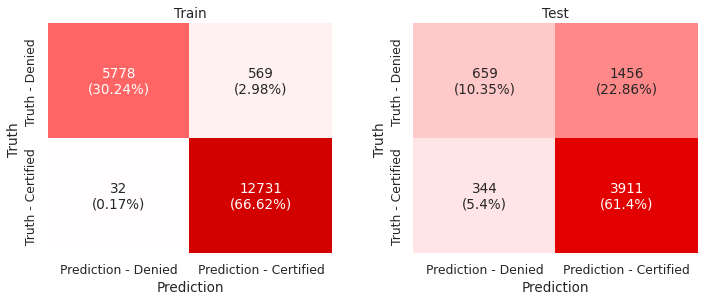

In [63]:
# Confusion matrix of the tuned model (tuned bagging classifier)

# Reconstructing the training data
y_recon = bgc_tuned.predict(X_train);
# Forecasting the testing data
y_pred = bgc_tuned.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
confusion_matrix_plot(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.title('Test');
plt.tight_layout(w_pad = 3);

In [64]:
# Evaluating the performance of the tuned model (tuned bagging classifier) on training and testing sets
bgc_tuned_perform = model_eval(bgc_tuned, X_train, X_test, y_train, y_test)
bgc_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.969,0.997,0.957,0.977,0.910
Test,0.717,0.919,0.729,0.813,0.312


#### Observations:

*   The bagging classifier, despite being an ensemble technique made up of numerous independent classifiers, clearly suffers from overfitting, as indicated by the sizeable disparity between the performance metrics for the training and testing data. 

*   Even the tuning hasn't resolved the issue of overfitting very much, but it has boosted the accuracy, recall and F1 scores on the testing set by choosing more optimal hyperparameters.

### Random Forest

In [65]:
# Building the initial model (untuned random forest)
rfc0 = RandomForestClassifier(class_weight = {0: 0.668, 1: 0.332}, random_state = 1)
rfc0 = rfc0.fit(X_train, y_train)

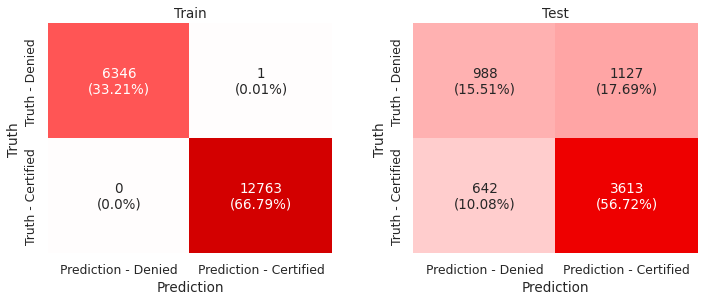

In [66]:
# Confusion matrix of the initial model (random forest)

# Reconstructing the training data
y_recon = rfc0.predict(X_train);
# Forecasting the testing data
y_pred = rfc0.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
confusion_matrix_plot(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.title('Test');
plt.tight_layout(w_pad = 3);

In [67]:
# Evaluating the performance of the initial model (untuned random forest) on training and testing sets
rfc0_perform = model_eval(rfc0, X_train, X_test, y_train, y_test)
rfc0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,1.000,1.000,1.000,1.000,1.000
Test,0.722,0.849,0.762,0.803,0.467


In [68]:
# Tuning the initial model (random forest)

# Defining the base model
base_model = RandomForestClassifier(class_weight = {0: 0.668, 1: 0.332}, random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'max_depth': np.arange(2, 8), 'min_samples_leaf': [2, 4, 8, 15],
               'min_impurity_decrease': [1e-4, 1e-3, 0.01], 'n_estimators': [50, 100, 150, 200, 300],
               'max_samples': np.arange(0.5, 1.1, 1), 'max_features': np.arange(0.5, 1.1, 1)}

# Setting the accuracy criterion
acc_criterion = make_scorer(f1_score)

# Searching over all hyperparameters
all_models = GridSearchCV(base_model, param_grid = hyperparams, scoring = acc_criterion, cv = 5)
all_models = all_models.fit(X_train, y_train)

# Selecting the best model
rfc_tuned = all_models.best_estimator_ 
rfc_tuned = rfc_tuned.fit(X_train, y_train)
rfc_tuned

RandomForestClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=4,
                       max_features=0.5, max_samples=0.5,
                       min_impurity_decrease=0.0001, min_samples_leaf=15,
                       n_estimators=200, random_state=1)

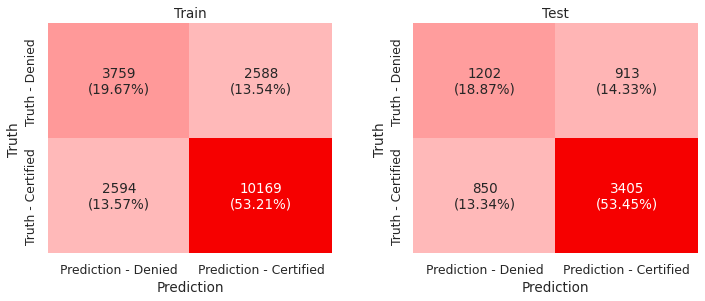

In [69]:
# Confusion matrix of the tuned model (random forest)

# Reconstructing the training data
y_recon = rfc_tuned.predict(X_train);
# Forecasting the testing data
y_pred = rfc_tuned.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
confusion_matrix_plot(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.title('Test');
plt.tight_layout(w_pad = 3);

In [70]:
# Evaluating the performance of the initial model (untuned random forest) on training and testing sets
rfc_tuned_perform = model_eval(rfc_tuned, X_train, X_test, y_train, y_test)
rfc_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.729,0.797,0.797,0.797,0.592
Test,0.723,0.800,0.789,0.794,0.568


### Observations:

*   Despite performing fairly well on the testing set, the original (untuned) random forest reveals huge divide between the evaluation scores on the training and testing data, most likely since the trees have grown too deep and large, beyond what's really needed.

*   Hyperparameter tuning of the random forest model has resolved the overfitting issue, while yielding similar performance metrics on the training set.

### AdaBoost Classifier

In [71]:
# Building the initial model (untuned adaboost classifier)
abc0 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 1, random_state = 1), 
                          random_state = 1)
abc0 = abc0.fit(X_train, y_train)

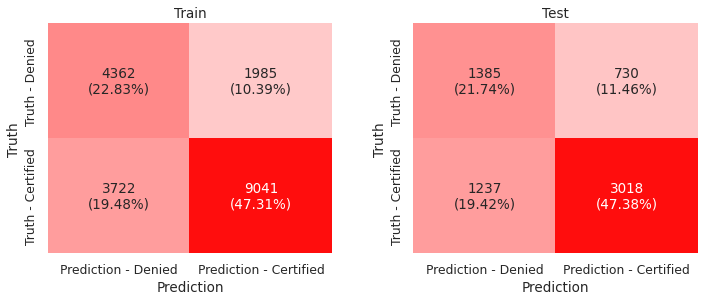

In [72]:
# Confusion matrix of the initial model (untuned adaboost classifier)

# Reconstructing the training data
y_recon = abc0.predict(X_train);
# Forecasting the testing data
y_pred = abc0.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
confusion_matrix_plot(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.title('Test');
plt.tight_layout(w_pad = 3);

In [73]:
# Evaluating the performance of the initial model (untuned adaboost classifier) on training and testing sets
abc0_perform = model_eval(abc0, X_train, X_test, y_train, y_test)
abc0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.701,0.708,0.820,0.760,0.687
Test,0.691,0.709,0.805,0.754,0.655


In [74]:
# Tuning the initial model (adaboost classifier)

# Defining the base model
base_model = AdaBoostClassifier(random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'base_estimator': [DecisionTreeClassifier(class_weight = 'balanced', max_depth = 1, random_state = 1),
                                  DecisionTreeClassifier(class_weight = 'balanced', max_depth = 2, random_state = 1),
                                  DecisionTreeClassifier(class_weight = 'balanced', max_depth = 3, random_state = 1)],
               'n_estimators': [5, 10, 20, 50, 100], 'learning_rate': list(np.arange(0.1, 0.51, 0.1)) + [1]}

# Setting the accuracy criterion
acc_criterion = make_scorer(f1_score)

# Searching over all hyperparameters
all_models = GridSearchCV(base_model, param_grid = hyperparams, scoring = acc_criterion, cv = 5)
all_models = all_models.fit(X_train, y_train)

# Selecting the best model
abc_tuned = all_models.best_estimator_ 
abc_tuned = abc_tuned.fit(X_train, y_train)
abc_tuned

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=2,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=10, random_state=1)

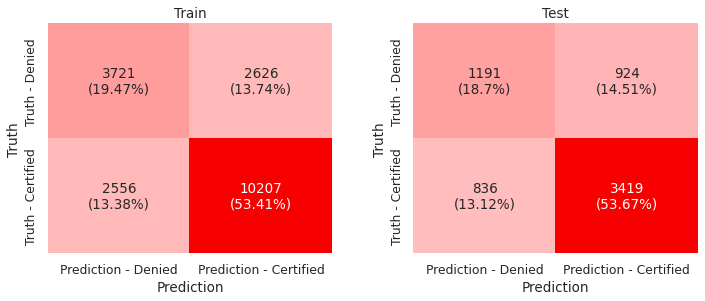

In [75]:
# Confusion matrix of the tuned model (adaboost classifier)

# Reconstructing the training data
y_recon = abc_tuned.predict(X_train);
# Forecasting the testing data
y_pred = abc_tuned.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
plt.title('Train');
confusion_matrix_plot(y_train, y_recon);
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.title('Test');
plt.tight_layout(w_pad = 3);

In [76]:
# Evaluating the performance of the initial model (untuned adaboost classifier) on training and testing sets
abc_tuned_perform = model_eval(abc_tuned, X_train, X_test, y_train, y_test)
abc_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.729,0.800,0.795,0.798,0.586
Test,0.724,0.804,0.787,0.795,0.563


#### Observations:

*   The small trees (max_depth = 1) used to construct the AdaBoost Classifier, have expectedly resulted in a model that doesn't suffer from overfitting at all (even without tuning). The trees used for building the tuned model are slightly more complex (max_depth = 2), resulting in the improved performance on the testing data.

*   Tuning has even further closed the gap between the performance metrics on the training and testing data. 

*   Interestingly, the tuned model has picked n_estimators = 10 as the optimal value, indicating the fast convergence of AdaBoost Classifier (at least for this problem).

### Gradient Boosting

In [77]:
# Building the initial model (untuned gradient boosting classifier)
gbm0 = GradientBoostingClassifier(init = abc0, random_state = 1) 
gbm0 = gbm0.fit(X_train, y_train)

#### Notes
In order to accelerate the convergence of the Gradient Boosting Classifier, instead of prior, we have initialized the GBM with the untuned AdaBoost Classifier we developed in the previous step.

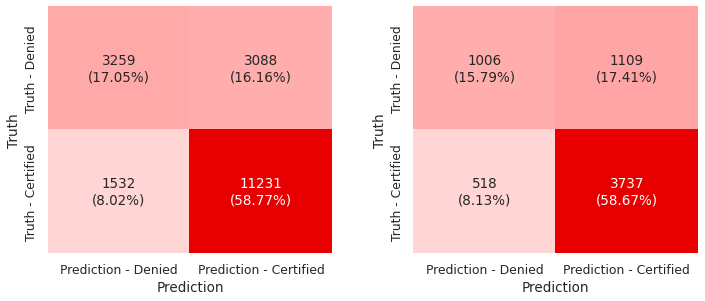

In [78]:
# Confusion matrix of the initial model (gradient boosting classifier)

# Reconstructing the training data
y_recon = gbm0.predict(X_train);
# Forecasting the testing data
y_pred = gbm0.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
confusion_matrix_plot(y_train, y_recon);
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.tight_layout(w_pad = 3);

In [79]:
# Evaluating the performance of the initial model (untuned adaboost classifier) on training and testing sets
gbm0_perform = model_eval(gbm0, X_train, X_test, y_train, y_test)
gbm0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.758,0.880,0.784,0.829,0.513
Test,0.745,0.878,0.771,0.821,0.476


In [80]:
# Tuning the initial model (gradient boosting classifier)

# Defining the base model
base_model = GradientBoostingClassifier(init = abc0, random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'subsample': (0.5, 1.1, 1), 'max_features': np.arange(0.5, 1.1, 1),
               'n_estimators': [50, 100, 150, 200], 'learning_rate': np.arange(0.05, 0.26, 0.05)}

# Setting the accuracy criterion
acc_criterion = make_scorer(f1_score)

# Searching over all hyperparameters
all_models = GridSearchCV(base_model, param_grid = hyperparams, scoring = acc_criterion, cv = 5)
all_models = all_models.fit(X_train, y_train)

# Selecting the best model
gbm_tuned = all_models.best_estimator_ 
gbm_tuned = gbm_tuned.fit(X_train, y_train)
gbm_tuned

GradientBoostingClassifier(init=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   random_state=1),
                           learning_rate=0.05, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=1)

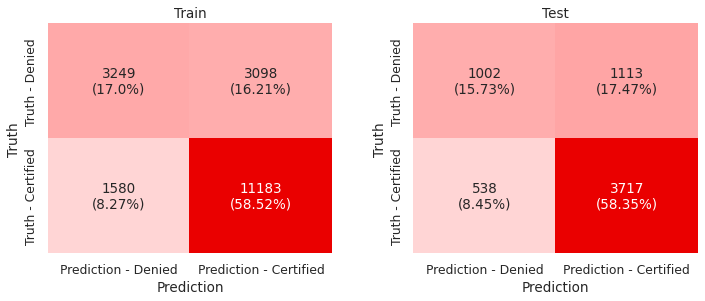

In [81]:
# Confusion matrix of the tuned model (tuned gradient boosting classifier)

# Reconstructing the training data
y_recon = gbm_tuned.predict(X_train);
# Forecasting the testing data
y_pred = gbm_tuned.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
confusion_matrix_plot(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
confusion_matrix_plot(y_test, y_pred);
plt.title('Test');
plt.tight_layout(w_pad = 3);

In [82]:
# Evaluating the performance of the tuned model (tuned gradient boosting classifier) on training and testing sets
gbm_tuned_perform = model_eval(gbm_tuned, X_train, X_test, y_train, y_test)
gbm_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.755,0.876,0.783,0.827,0.512
Test,0.741,0.874,0.770,0.818,0.474


#### Observations:

*   The large number of sequentially augmented estimators used in building the GBM, along with the fact that the overall structure of each estimator is fairly simple (a tree with max_depth = 3), has provided us with robust and accurate (untuned and tuned) GBM models, with no overfitting problem. 

*   The tuned model has selected a very low learning rate (0.05) and a fairly large number of estimators (150). Note the trade-off between the two, i.e., a lower learning rate requires using more (sequential and incrementally improving) classifiers, typically leading to a more robust and accurate model, which doesn't suffer from overfitting.  

### Stacking Classifier

In [83]:
# Settimg the base estimators of the stacking classifier
base_classifiers = [('Bagging Classifier', bgc_tuned), ('Random Forest', rfc_tuned),
                    ('AdaBoost Classifier', abc_tuned), ('GBM Classifier', gbm_tuned)]

# Setting the baseline parameters of the stacking classifier 
base_stacker = StackingClassifier(estimators = base_classifiers)

# Setting the range of hyperparameters of the stacking classifier
hyperparams = {'final_estimator': [XGBClassifier(scale_pos_weight = 0.5, eval_metric = 'logloss', random_state = 1),
                                   XGBClassifier(scale_pos_weight = 1, eval_metric = 'logloss', random_state = 1),
                                   XGBClassifier(scale_pos_weight = 2, eval_metric = 'logloss', random_state = 1)]}

# Setting the accuracy criterion
acc_criterion = make_scorer(f1_score)

# Looping over all meta-classifiers
all_stackers = GridSearchCV(base_stacker, param_grid = hyperparams, scoring = acc_criterion, cv = 5)
all_stackers = all_stackers.fit(X_train, y_train)

# Selecting the best model
stc = all_stackers.best_estimator_ 
stc = stc.fit(X_train, y_train)
print('The positive weight in the final estimator of the stacking classifier is {}.'.format(stc.final_estimator_.scale_pos_weight))

The positive weight in the final estimator of the stacking classifier is 1.


#### Notes:

Here, due to the massive computational cost of XGBoost, which has been chosen as the meta-classifier of the stacking model, we only play around with one of its hyperparameters -- scale_pos_weight, which often turns out to be the most influential one. 

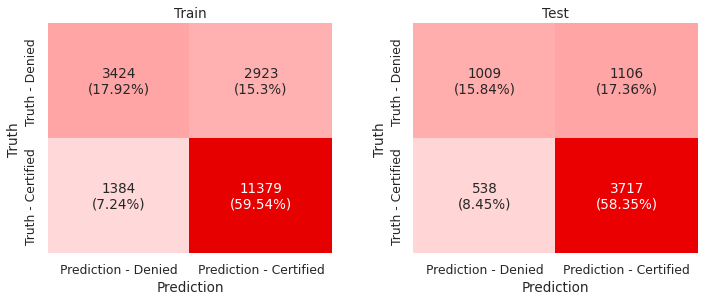

In [84]:
# Confusion matrix of the stacking classifier

# Reconstructing the training data
y_recon = stc.predict(X_train);
# Forecasting the testing data
y_pred = stc.predict(X_test);

# Plotting the confusion matrices of training and testing sets
plt.figure(figsize = (10, 4.4));
plt.subplot(121);
plt.title('Train');
confusion_matrix_plot(y_train, y_recon);
plt.subplot(122);
plt.title('Test');
confusion_matrix_plot(y_test, y_pred);
plt.tight_layout(w_pad = 3);

In [85]:
# Evaluating the performance of the stacking classifier on training and testing sets
stc_perform = model_eval(stc, X_train, X_test, y_train, y_test)
stc_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.775,0.892,0.796,0.841,0.539
Test,0.742,0.874,0.771,0.819,0.477


#### Observations:

*   Unsurprisingly, the stacking classifier doesn't suffer from overfitting, as the final estimator is trained using the predictions of the base estimators (which all are tuned and well-performing), with no access to the original data. Regardless, the performance metrics of the stacking classifier are quite good on both training and testing sets. 

*   Among all the provided weights for positive class, the model has chosen 1 (no weighting). This can be attributed to the fact that there isn't a very big imbalance in the data (1:2 ratio between denied and certified classes), and since the positive class comprise the majority of the dataset, a high F1 score could be achieved by increasing the recall and precision scores of the positive (certified) class.

## Comparison of All Models



In [86]:
# Merging the performance dataframes of all models
model_comparison = pd.concat([dtr0_perform, dtr_tuned_perform, bgc0_perform, bgc_tuned_perform, 
                              rfc0_perform, rfc_tuned_perform, abc0_perform, abc_tuned_perform,
                              gbm0_perform, gbm_tuned_perform, stc_perform])

# Separating the performance metrics for training and testing sets
train_comparison = model_comparison[::2]
test_comparison = model_comparison[1::2]

# Setting the indices of dataframes as the names of models
train_comparison.index = ['Full Tree', 'Tuned Tree', 'Bagging Classifier', 'Tuned Bagging Classifier',
                          'Random Forest', 'Tuned Random Forest', 'AdaBoost Classifier', 
                          'Tuned AdaBoost Classifier', 'Gradient Boosting Classifier',
                          'Tuned Gradient Boosting Classifier', 'Stacking Classifier'] 
test_comparison.index  = ['Full Tree', 'Tuned Tree', 'Bagging Classifier', 'Tuned Bagging Classifier',
                          'Random Forest', 'Tuned Random Forest', 'AdaBoost Classifier', 
                          'Tuned AdaBoost Classifier', 'Gradient Boosting Classifier',
                          'Tuned Gradient Boosting Classifier', 'Stacking Classifier'] 

In [87]:
# Comparing the model performances on training set
train_comparison.sort_values(by = 'F1', ascending = False)

,Accuracy,Recall,Precision,F1,Specificity
Full Tree,1.000,1.000,1.000,1.000,1.000
Random Forest,1.000,1.000,1.000,1.000,1.000
Bagging Classifier,0.986,0.987,0.992,0.990,0.985
Tuned Bagging Classifier,0.969,0.997,0.957,0.977,0.910
Stacking Classifier,0.775,0.892,0.796,0.841,0.539
Gradient Boosting Classifier,0.758,0.880,0.784,0.829,0.513
Tuned Gradient Boosting Classifier,0.755,0.876,0.783,0.827,0.512
Tuned Tree,0.737,0.820,0.794,0.807,0.572
Tuned AdaBoost Classifier,0.729,0.800,0.795,0.798,0.586
Tuned Random Forest,0.729,0.797,0.797,0.797,0.592


In [88]:
# Comparing the model performances on testing set
test_comparison.sort_values(by = 'F1', ascending = False)

,Accuracy,Recall,Precision,F1,Specificity
Gradient Boosting Classifier,0.745,0.878,0.771,0.821,0.476
Stacking Classifier,0.742,0.874,0.771,0.819,0.477
Tuned Gradient Boosting Classifier,0.741,0.874,0.770,0.818,0.474
Tuned Bagging Classifier,0.717,0.919,0.729,0.813,0.312
Tuned Tree,0.732,0.824,0.785,0.804,0.545
Random Forest,0.722,0.849,0.762,0.803,0.467
Tuned AdaBoost Classifier,0.724,0.804,0.787,0.795,0.563
Tuned Random Forest,0.723,0.800,0.789,0.794,0.568
Bagging Classifier,0.700,0.786,0.770,0.778,0.527
AdaBoost Classifier,0.691,0.709,0.805,0.754,0.655


#### Observations:

*   As anticipated, the full tree reveals the biggest performance disparity between the training and testing sets. The full tree has specifically been tailored for the training set and, as a result, it reveals the weakest performance for the testing set.

*   The (untuned) Gradient Boosting Classifier has the highest F1 and accuracy scores as well as the second highest recall score. This model is built off of very simple trees (with max_depth = 3), which gradually improve themselves, explaining why overfitting, even without tuning, wasn't an issue for this model.

*   Overall, hyperparameter tuning has helped resolving the overfitting problem, and has either yielded similar accuracy metrics or has somewhat improved the performance of the models on the testing data.

*   Stacking classifiers, employing the tuned bagging, random forest, adaboost and gradient boosting classifiers as the base estimators and an XGBoost classifer as the meta-estimator, slightly underperforms the GBM and ranks no. 2, based on its F1 and accuracy scores.

*   All models have fairly low specificty scores (caused by a fairly large number of FP's), i.e., they all somewhat fall short in correctly classifying the zero class (denied applicants). This can be mainly attributed to two factos: 1) This accuracy score wasn't the basis of optimizing the models. 2) The denied class is represented less and makes up only about 1/3 of the data. Using balanced class weights helped improving this score, but didn't increase it to the level of other performance measures.

## Importance of Features 

For the sake of brevity, here, we limit our attention only to the top five models (based on F1-score on testing set), for which feature_importances_ attribute exists -- *GBM*, *tuned GBM* and *tuned decision tree*. 

### Gradient Boosting Classifier

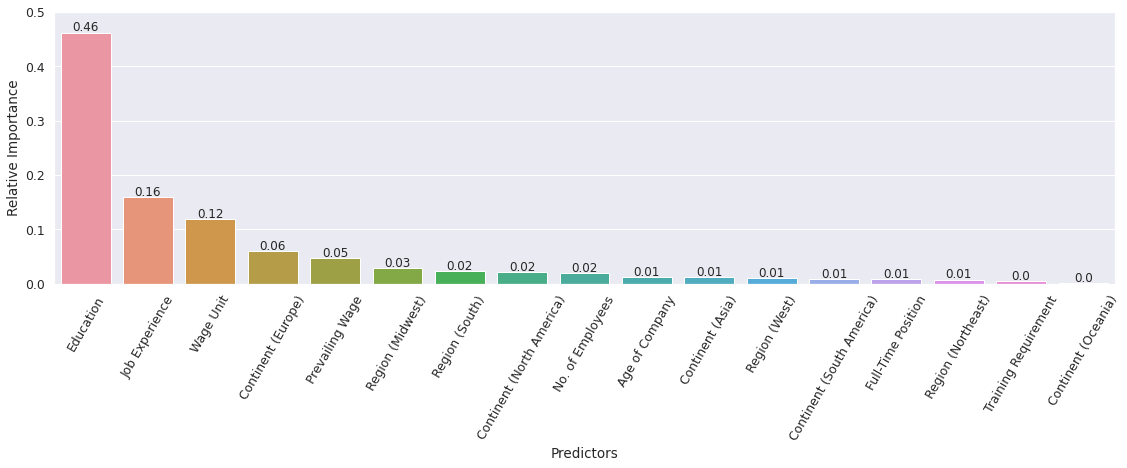

In [89]:
# Making a dataframe of the relative importance of all predictors
preds_importance = pd.DataFrame({'Predictors': X_train.columns.tolist(), 
                                'Relative_Importance': gbm0.feature_importances_})
# Shortening the name of predictors
preds_importance['Predictors'] = preds_importance['Predictors'].replace(X_train.columns.tolist(),
    ['Education', 'No. of Employees', 'Prevailing Wage', 'Wage Unit', 'Age of Company', 'Continent (Asia)',
     'Continent (Europe)', 'Continent (North America)', 'Continent (Oceania)', 'Continent (South America)',
     'Job Experience', 'Training Requirement', 'Region (Midwest)', 'Region (Northeast)', 'Region (South)', 
     'Region (West)', 'Full-Time Position'])
# Sorting the rows based on the magnitude of the relative importance
preds_importance.sort_values(by = 'Relative_Importance', ascending = False, inplace = True)

# Plotting the relative importance of all predictors
plt.figure(figsize = (19, 5));
barplt = sns.barplot(data = preds_importance, x = 'Predictors', y = 'Relative_Importance');
countplot_labeling(barplt, preds_importance, perc = False, decimal = 2);
plt.xlabel('Predictors');
plt.ylabel('Relative Importance');
plt.xticks(rotation = 60, ha = 'center');
plt.ylim(0, 0.5);

### Tuned Gradient Boosting Classifier

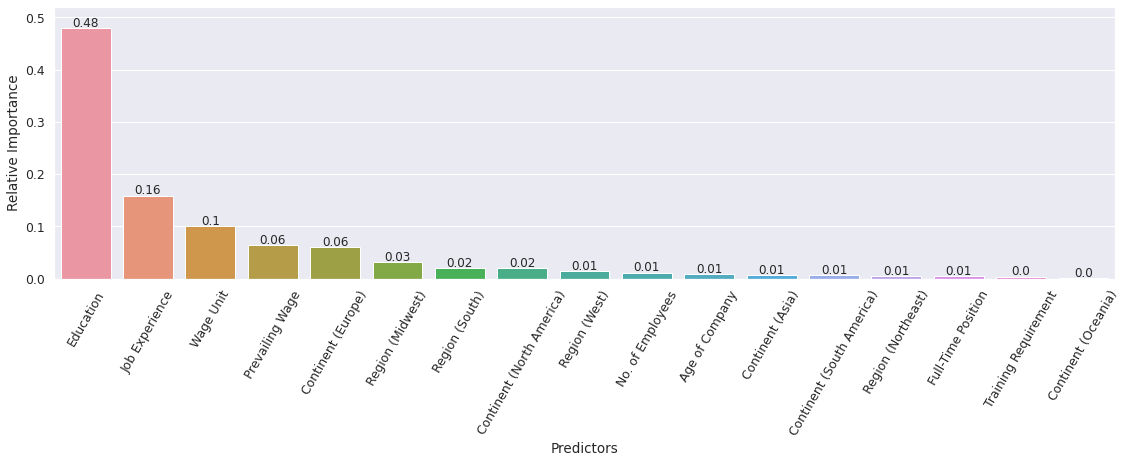

In [90]:
# Making a dataframe of the relative importance of all predictors
preds_importance = pd.DataFrame({'Predictors': X_train.columns.tolist(), 
                                'Relative_Importance': gbm_tuned.feature_importances_})
# Shortening the name of predictors
preds_importance['Predictors'] = preds_importance['Predictors'].replace(X_train.columns.tolist(),
    ['Education', 'No. of Employees', 'Prevailing Wage', 'Wage Unit', 'Age of Company', 'Continent (Asia)',
     'Continent (Europe)', 'Continent (North America)', 'Continent (Oceania)', 'Continent (South America)',
     'Job Experience', 'Training Requirement', 'Region (Midwest)', 'Region (Northeast)', 'Region (South)', 
     'Region (West)', 'Full-Time Position'])
# Sorting the rows based on the magnitude of the relative importance
preds_importance.sort_values(by = 'Relative_Importance', ascending = False, inplace = True)

# Plotting the relative importance of all predictors
plt.figure(figsize = (19, 5));
barplt = sns.barplot(data = preds_importance, x = 'Predictors', y = 'Relative_Importance');
countplot_labeling(barplt, preds_importance, perc = False, decimal = 2);
plt.xlabel('Predictors');
plt.ylabel('Relative Importance');
plt.xticks(rotation = 60, ha = 'center');
plt.ylim(0, 0.52);

### Tuned Decision Tree

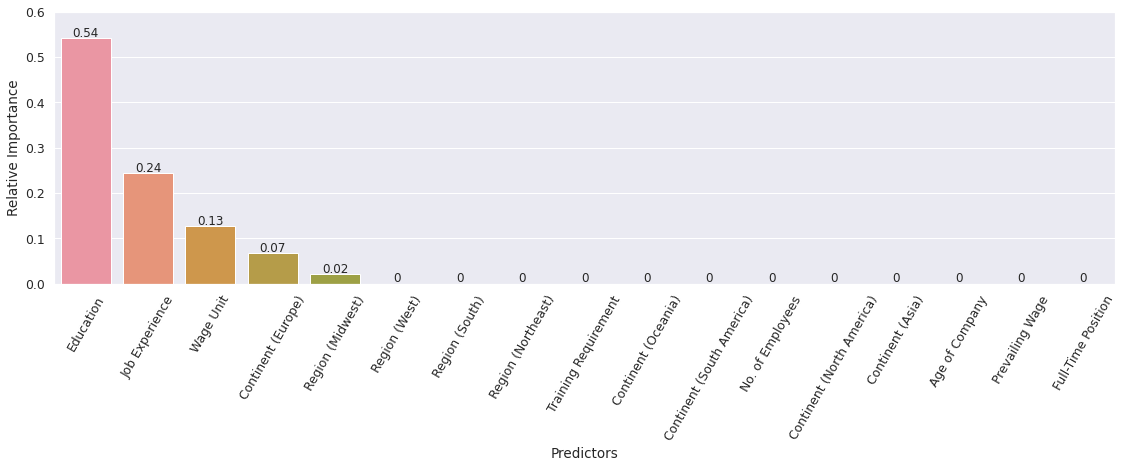

In [91]:
# Making a dataframe of the relative importance of all predictors
preds_importance = pd.DataFrame({'Predictors': X_train.columns.tolist(), 
                                'Relative_Importance': dtr_tuned.feature_importances_})
# Shortening the name of predictors
preds_importance['Predictors'] = preds_importance['Predictors'].replace(X_train.columns.tolist(),
    ['Education', 'No. of Employees', 'Prevailing Wage', 'Wage Unit', 'Age of Company', 'Continent (Asia)',
     'Continent (Europe)', 'Continent (North America)', 'Continent (Oceania)', 'Continent (South America)',
     'Job Experience', 'Training Requirement', 'Region (Midwest)', 'Region (Northeast)', 'Region (South)', 
     'Region (West)', 'Full-Time Position'])
# Sorting the rows based on the magnitude of the relative importance
preds_importance.sort_values(by = 'Relative_Importance', ascending = False, inplace = True)

# Plotting the relative importance of all predictors
plt.figure(figsize = (19, 5));
barplt = sns.barplot(data = preds_importance, x = 'Predictors', y = 'Relative_Importance');
countplot_labeling(barplt, preds_importance, perc = False, decimal = 2);
plt.xlabel('Predictors');
plt.ylabel('Relative Importance');
plt.xticks(rotation = 60, ha = 'center');
plt.ylim(0, 0.6);

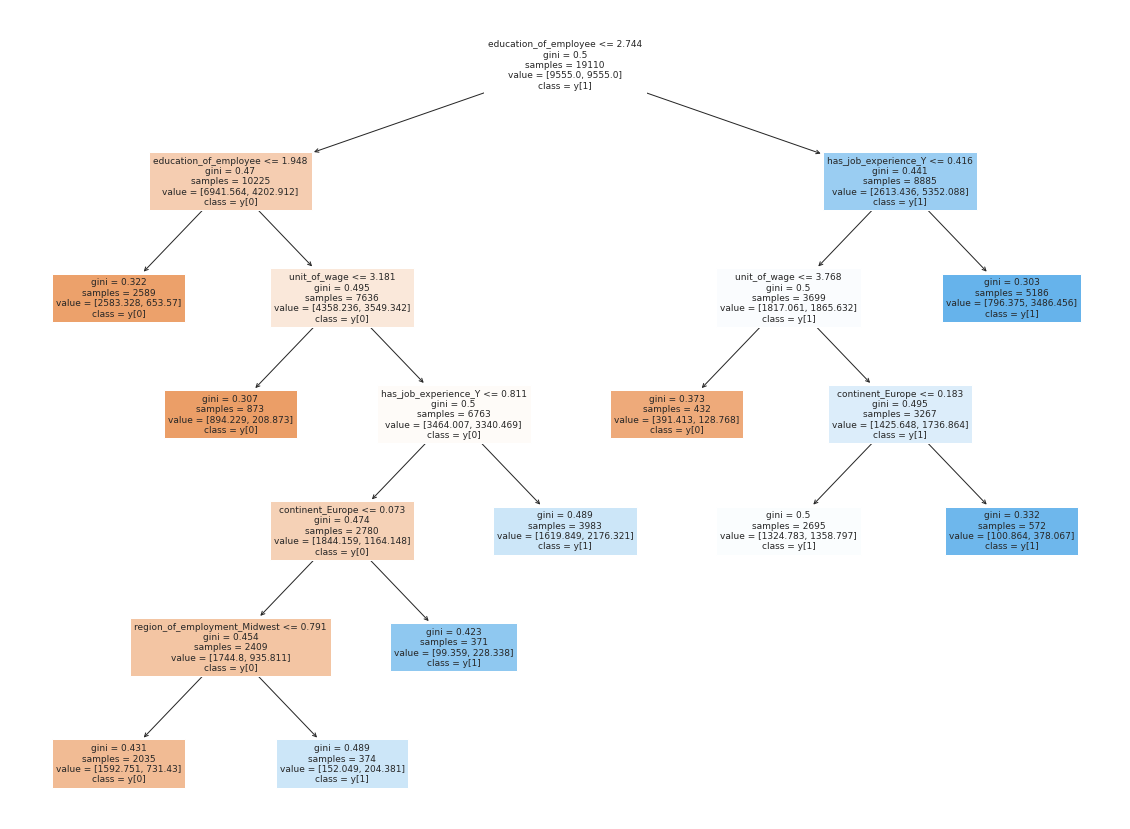

In [92]:
# Plotting the pre-pruned decision tree
plt.figure(figsize = (20, 15))
tree.plot_tree(dtr_tuned, feature_names = X.columns.tolist(),
               filled = True, fontsize = 9, class_names = True, node_ids = False)
plt.show()

In [93]:
# Printing out the equations of the pre-pruned decision tree
print(tree.export_text(dtr_tuned, feature_names = X.columns.tolist(), show_weights = True))

|--- education_of_employee <= 2.74
|   |--- education_of_employee <= 1.95
|   |   |--- weights: [2583.33, 653.57] class: 0
|   |--- education_of_employee >  1.95
|   |   |--- unit_of_wage <= 3.18
|   |   |   |--- weights: [894.23, 208.87] class: 0
|   |   |--- unit_of_wage >  3.18
|   |   |   |--- has_job_experience_Y <= 0.81
|   |   |   |   |--- continent_Europe <= 0.07
|   |   |   |   |   |--- region_of_employment_Midwest <= 0.79
|   |   |   |   |   |   |--- weights: [1592.75, 731.43] class: 0
|   |   |   |   |   |--- region_of_employment_Midwest >  0.79
|   |   |   |   |   |   |--- weights: [152.05, 204.38] class: 1
|   |   |   |   |--- continent_Europe >  0.07
|   |   |   |   |   |--- weights: [99.36, 228.34] class: 1
|   |   |   |--- has_job_experience_Y >  0.81
|   |   |   |   |--- weights: [1619.85, 2176.32] class: 1
|--- education_of_employee >  2.74
|   |--- has_job_experience_Y <= 0.42
|   |   |--- unit_of_wage <= 3.77
|   |   |   |--- weights: [391.41, 128.77] class: 0
|   |

### Observations:

*   Since ensemble techniques consist of several distinct estimators, each with a different (somewhat randomly decided) structure, they distribute the relative importance among a larger number of predictors (e.g., compared to regular decision trees), instead of using only a few of the features to build the whole model. 

*   Regardless, all three models studied here, choose ***the education level***, the existence of ***previous job experience*** and ***the unit of wage*** as the most effective parameters in determining the class of each applicant.

*   Counterintuitively, but consistent with EDA-based observations, requiring training isn't a decisive factor, perhaps because most applicants do not need training anyways.

*   Among all continents Europe, and among all regions midwest appear to have the highest importance. Nonetheless, the continent from which the applicant comes and the region of employment do not have substantial impacts on the models. 


## Actionable Insights and Recommendations

Here, we do not intend to present a detailed and long summary of all observations. Instead, we seek to briefly revisit major findings, and draw actionable conclusions and recommendations from them.

***Key observations from EDA and classification models:***

* About 1/3 of applicants aren't qualified enough to be certified. Therefore, it's of high importance to the US government and employers supporting the visa application, to know in advance how the profile of an eligible applicant looks like, or even more helpful is to have a predictive model separating the qualified candidates from the others. This assists companies not to spend money on candidates who have a low chance of approval, and the US government to save time, money and efforts by automating its vsia approval process, while still keeping it robust, and capable of sifting workers who can really contribute to the US economic growth.
* The best-performing model (based on F1 score) developed in this project is capable of recalling ~ 88% of qualified applicants with a precision of ~ 77%. This model, which is an untuned Gradient Boosting Classifier, has an accuracy score of 0.745 and doesn't suffer from an overfitting issue. Overall, the performance metrics of this model, are reasonably good.
*  Overall, boosting techniques proved to be less susceptible to overfitting than bagging techniques. We remark that the former classifiers are constructed using more simple trees. (E.g., decision trees with max_depth = 1 and max_depth = 3 are respectively the default estimators of AdaBoost and GBM classifiers.) This further emphasizes the need for hyperparameter tuning for bagging methods (bagging classifier and random forest).
*  All top-performing models pick educational background, previous job experience or lack thereof and the unit of wage, in the same order, as the most influential predictors of the class of an applicant.   
*  Those with only a high school diploma have a nearly 2/3 chance of getting denied, while those with a doctorate degree have a close to 90% approval rate.
*  The presence of previous job experience in an applicant's resume increaes its probabaility of certification by about 20%.
*  The certification rate for those paid on an hourly basis is about 1/3, while this statistic for the other wage units (week, month and year) is more than 60%.
*   Job training requirement has almost no effect on the rate of certification.
*   While worker's cotinent of origin isn't the most crucial factor in the denial or approval of the application, those coming from Europe have a somewhat higher rate of approval (~ 80%). Note also that ~ 2/3 of applicants come from Asia. 
*   Although the region of employment doesn't play a very significant role in determining whether an application gets approved or not, the approval rate of Midwest stands somewhat higher than the other regions.

***Business recommendations:***

*  Paying on an hourly basis can significantly lessen the approval chances of an application. Therefore, if possible, a company is highly advised to change its payment basis from hour to week pr month, if someone is supposed to work for them for a period longer than a couple of weeks.
*  A company needs to demonstrate the qualifications of a foreign worker over domestic competitions. An important steps towards achieving that is to hire someone with a strong educational background. Hiring workers with graduate degrees can certainly highlight this.
*  Hiring foreign workers with previous job experience can smooth out the visa application process and increase the chance of certification, however those with no experience still have a 56.1% approval rate. Therefore, this doesn't imply that companies should neglect highly educated and talented young workers.
*  Workers coming from all continents have a good chance of getting approved, but hiring workers from Europe (and after that Africa) might give less headaches to the employer. 


***Recommendations for future ML-based modeling:***

*  We detected some discrepancies and inconsistencies in the wage unit and prevailing wage columns. They all might be fine, and part of the actual data, but if OFLC collects these pieces of data more accurately, or asks companies and workers to fill out the application forms more accurately, it might also help with the robustness and performance of our ML-based models.
*  Due to the passage of certain laws by the US Congress, or the issuance of new Executive Orders by the US president, the approval rates of different groups might noticeably vary from year to year. Therefore, I suggest testing the models for different years or training it on a data extracted from several years (if this data isn't already) to ensure its validity over time. Regardless, this issue can be easily addressed, e.g., by training the models developed here on a dataset comprising multiple years.  
*  The certification of an application can hugely depend on the nationality of an applicant (even more than continent), and the diplomatic ties between the applicant's country and US. A new feature can thus be added indicating whether an applicant comes from a country which is under certain embargoes by the US or not. 